In [45]:
import matplotlib as mpl
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math, Latex
from numpy.random import rand
from pylab import rcParams, pcolor, show,colorbar, xticks, yticks, title, figure
from IPython.display import Image

## Correlation coefficient

We are often interested in whether two variables are "correlated" or not, and there are formal methods of measuring the degree of correlation.  First, we define the joint probability density.

### Joint probability density

Consider two random variables, $\{x(k)\}$ and $\{y(k)\}$.  These of course have their individual *probability density functions*, $p(x)$, and $p(y)$.  However we can also consider their **joint probability density** $p(x,y)$ defined in the same way as the univariate probability:

\begin{equation}
    p(x,y) = \displaystyle\lim_{\Delta y\to 0}  \displaystyle\lim_{\Delta x\to 0} \frac{1}{ \Delta x \Delta y}\mathrm{prob}\left[ x\lt x(k)\lt x+\Delta x;\\
    \ y\lt y(k)\lt y+\Delta y\right] 
\end{equation}

Note that $0\leq p(x,y) \leq 1$.  

From this definition, the probability that $a\leq x\leq b$ *and* $c\leq y\leq d$ is given by the double integral:

\begin{equation}
    \mathrm{prob}[a\leq x\leq b; c\leq y\leq d]=\int_c^d\int_a^b p(x,y) \mathrm{d}x\mathrm{d}y
\end{equation}

If we integrate one of the dimensions from $-\infty$ to $\infty$, then we recover the one-dimensional probability density of the other variable.  i.e.:

\begin{equation}
    p(x)=\int_{-\infty}^{\infty} p(x,y)\,\mathrm{d}y
\end{equation}

and of course the integral of the total domain is unity:

\begin{equation}
    \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} p(x,y)\,\mathrm{d}x\mathrm{d}y=1
\end{equation}

The **Linear Correlation coefficient** is defined as

\begin{equation}
    C_{xy} \equiv \frac{1}{\sigma_x\sigma_y}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} p(x,y) (x-\mu_x)(y-\mu_y)\ \mathrm{d}x\,\mathrm{d}y
\end{equation}

where $\mu_x$ is the *mean* of $x$, and $\sigma_x^2$ is the *variance*.  Note that $-1\leq C_{xy}\leq+1$.  

We say that two variables are **linearly uncorrelated** when $C_{xy}=0$.  

Note the use of the qualifier "linear" in both definitions.  That is beacause this only tests if the variables are linearly uncorrelated to each other, and does not tell us if they are independent.

### Approximations with real data
#### Approximate joint PDFs
When dealing with real data we do not know the joint pdf and we have to estimate the correlation coefficients
(just like we have to estimate the mean and the variance).  Often we get a feel for the joint pdf just by plotting
the two variables as dots versus one another.

Lets say $x$ is a variable, and $y=x+\eta$, where $\eta$ is some noise on top of $x$.
We would probably intuit that these are correlated if we looked at a scatter plot.

In [2]:
N=200
ntosig=0.5
x = np.random.randn(N)
y = x + np.random.randn(N)*ntosig

In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
rcParams['figure.figsize'] = (11, 6.5)
def fig5():
    fig,ax=plt.subplots(1,1)
    ax.plot(x,y,'.')
    ax.set_xlabel('x [units]');ax.set_ylabel('y [units]')
    

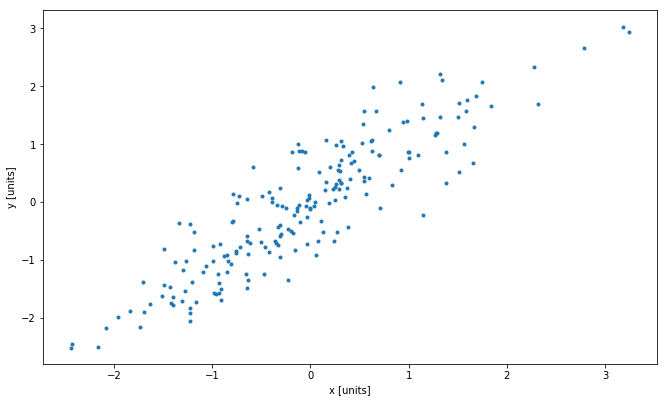

In [4]:
fig5()

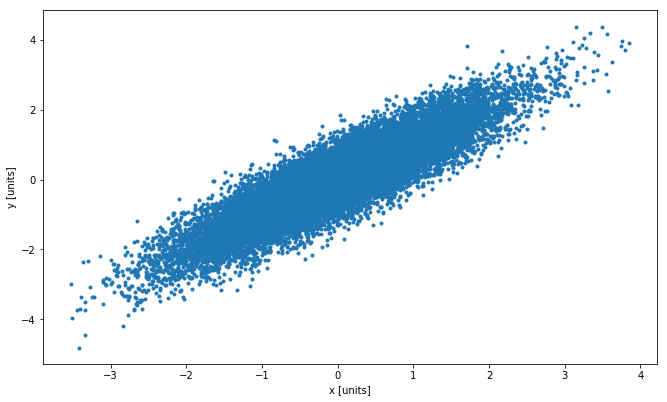

In [5]:
N=20000
ntosig=0.5
x = np.random.randn(N)
y = x + np.random.randn(N)*ntosig
fig5()

Quite messy, with many data points to plot.

A better way to look at this is to contour or pseudo contour the data density in bins,
just like the histograms for univariate data. Simplest way with matplotlib,


Text(0.5,1,'Joint PDF of x and y')

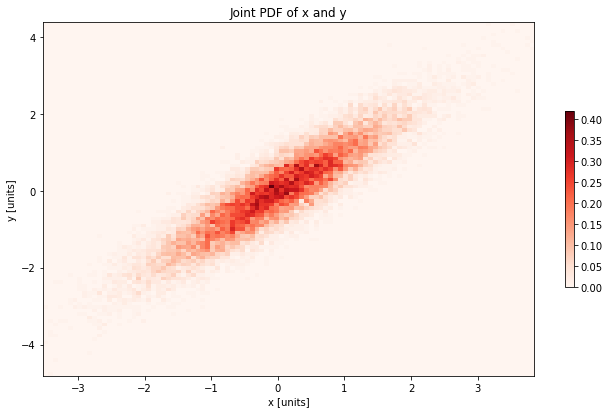

In [6]:
import matplotlib.cm as cm # import the colormaps.
fig,ax=plt.subplots(1,1)
(n,xx,yy,im)=ax.hist2d(x,y,bins=100,cmap=cm.Reds,cmin=0.,normed=True)
plt.colorbar(im,shrink=0.5)
ax.set_xlabel('x [units]');ax.set_ylabel('y [units]');ax.set_title('Joint PDF of x and y')

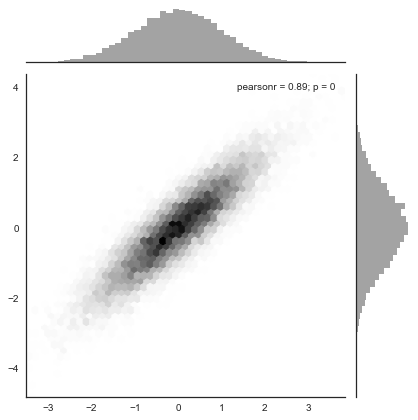

In [7]:
import seaborn as sns
sns.set(color_codes=True)

df = pd.DataFrame({'x': x, 'y': y})
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

How many bins to divide? There are many ways but rule of thumb: Freedman-Diaconis rule. Compute the Inter-Quartile-Range (IQR). 
If there are 1500 data points, you lay them out in ascending order... and take the 375th term (the one 25% of the way along)
and the 1125th term (the one 75% of the way along), this is the IQR. You also know N, the number of samples, which in this case in 1500.

$BinSize = 2\frac{IQR}{^{3}\sqrt{N}}$

### Kernel density estimation

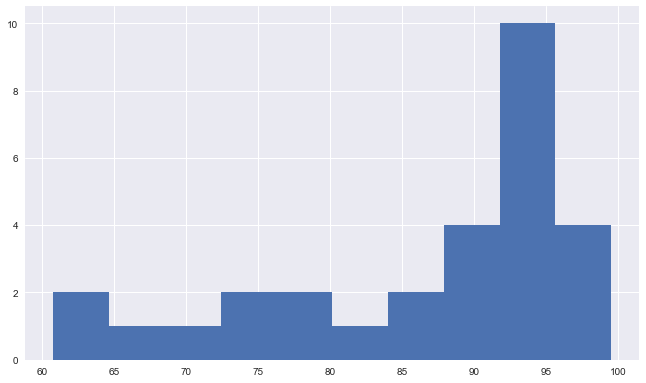

In [8]:
grades = np.array((93.5,93,60.8,94.5,82,87.5,91.5,99.5,86,
                   93.5,92.5,78,76,69,94.5,89.5,92.8,78,65.5,
                   98,98.5,92.3,95.5,76,91,95,61.4,96,90))
junk = plt.hist(grades)

### Why not histograms?

We can play around with the number of bins, but it's not totally clear what's going on with the left half of the grades.

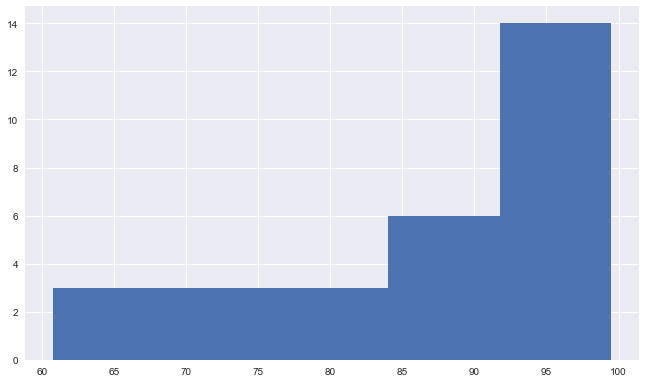

In [9]:
junk = plt.hist(grades,5)

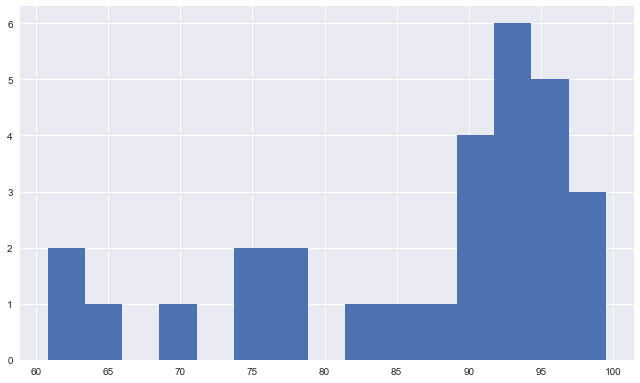

In [10]:
junk = plt.hist(grades,15)

optimal # of bins:  12.0


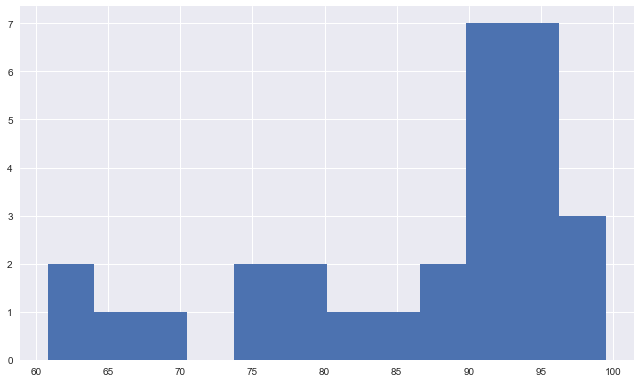

In [11]:
q75, q25 = np.percentile(grades, [75 ,25])
iqr = q75 - q25
fdr = (2.*np.ceil(iqr))/(np.power(len(grades),1./3))
print ('optimal # of bins: ', np.ceil(fdr))
fdr_hist = plt.hist(grades,np.ceil(fdr).astype(int))

So, maybe the histogram isn't the perfect tool for the job at hand. 
In fact, there are quite a few well-known problems with histograms.

Two of the main problems with histograms are (1) you need to define a bin size (many ways) and (2) you need to decide where the left edge of the bin is. Let's look at the effects of bin size on histograms. 

Let's start with `getHistBinNumAni` function.
What does that do? Given a data set, it'll give us an interactive plot.By dragging the slider around, we can make a histogram with anywhere from 1 bin to some max (default: 20) number of bins.
No matter how many bins we have, the actual data is shown in blue dots near the bottom. 
Here's what it looks like for the grades:

In [12]:
from numpy import histogram as nphistogram
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation as animation


def getHistBinNumAni(data,totalframes=None,showpts=True):
    #ion()
    if totalframes is None:
        totalframes = min(len(data)-1,100)
    fig = figure()
    ax = fig.gca()

    n, bins, patches = plt.hist(data, totalframes, normed=1, facecolor='green', alpha=0.0)
    if showpts:
        junk = plt.plot(data,0.2*np.ones_like(data),'bo')
    def animate(i):
        n, bins = nphistogram(data, i+1, normed=False)
        #print n
        ax.set_ylim(0,1.1*n.max())
        for j in range(len(n)):
            rect,h = patches[j],n[j]
            #print h.max()
            x = bins[j]
            w = bins[j+1] - x
            rect.set_height(h)
            rect.set_x(x)
            rect.set_width(w)
            rect.set_alpha(0.75)
        #fig.canvas.draw()
    
    ani = animation.FuncAnimation(fig, animate, totalframes, repeat=False)
    return ani


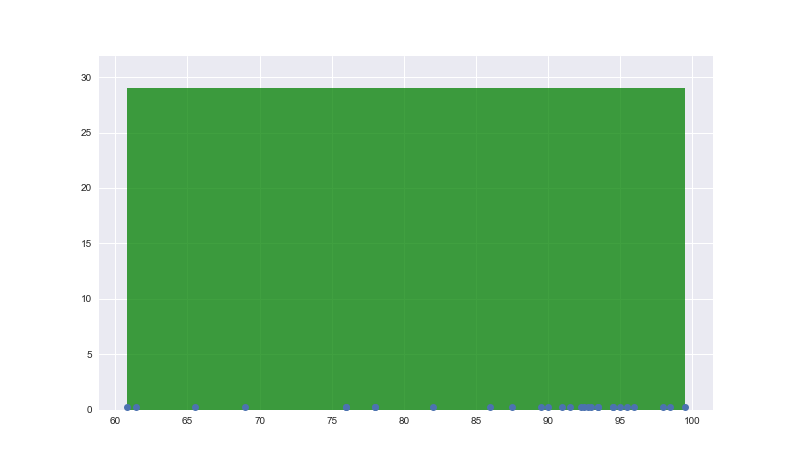
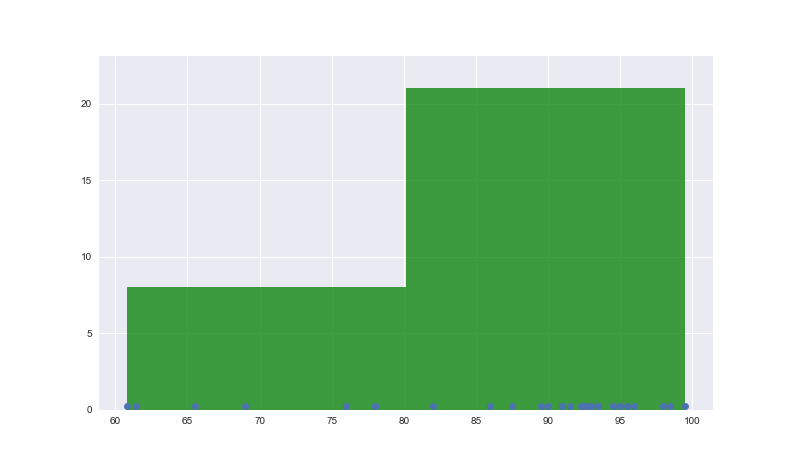
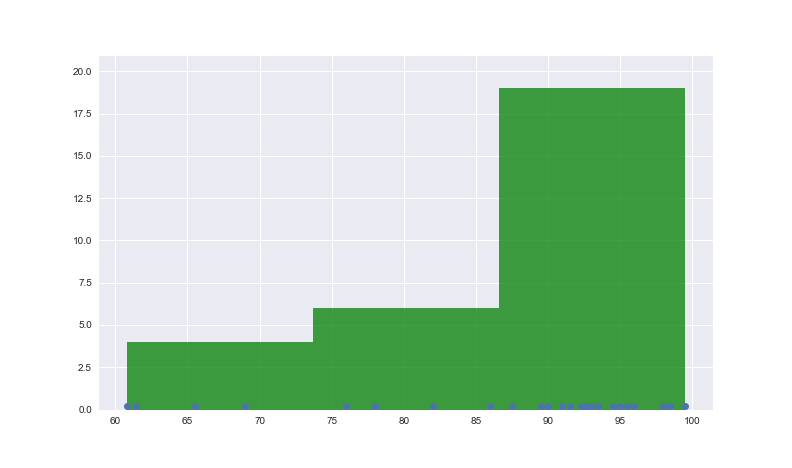
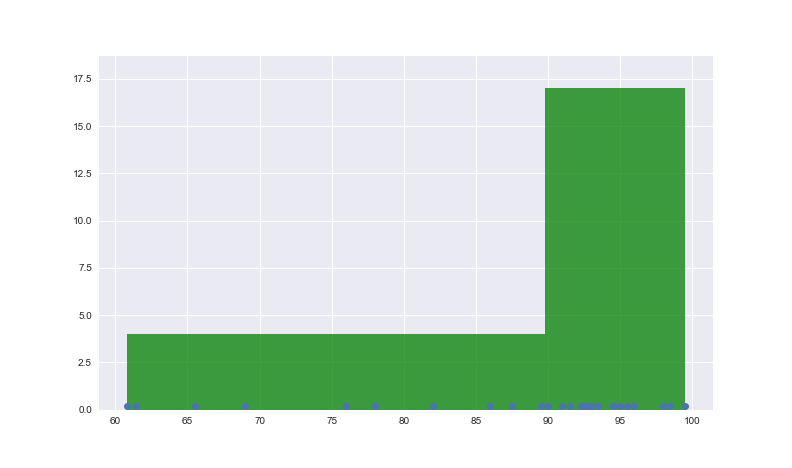
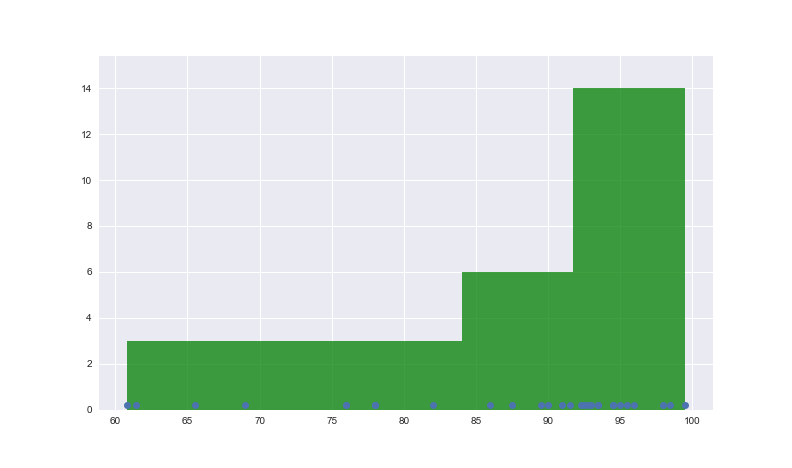
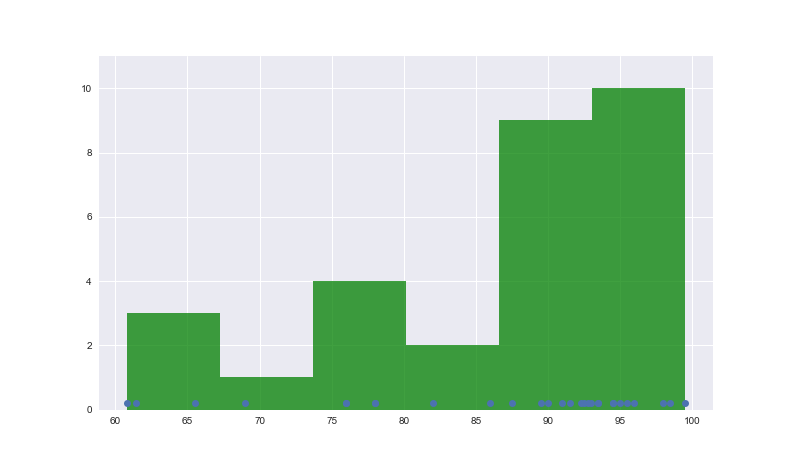
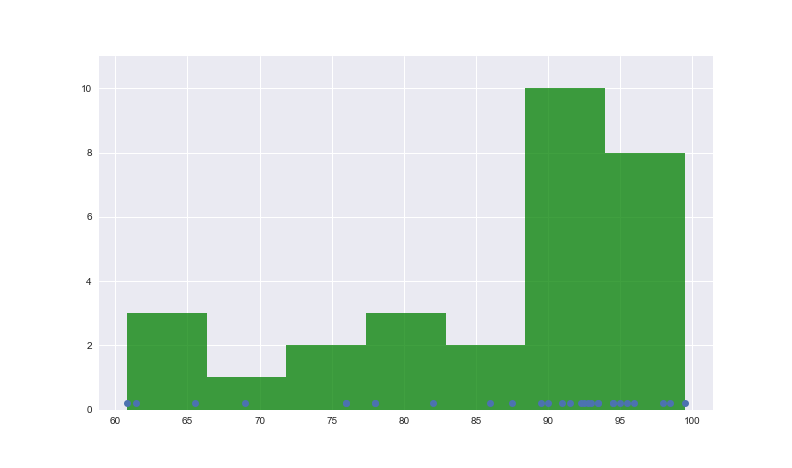
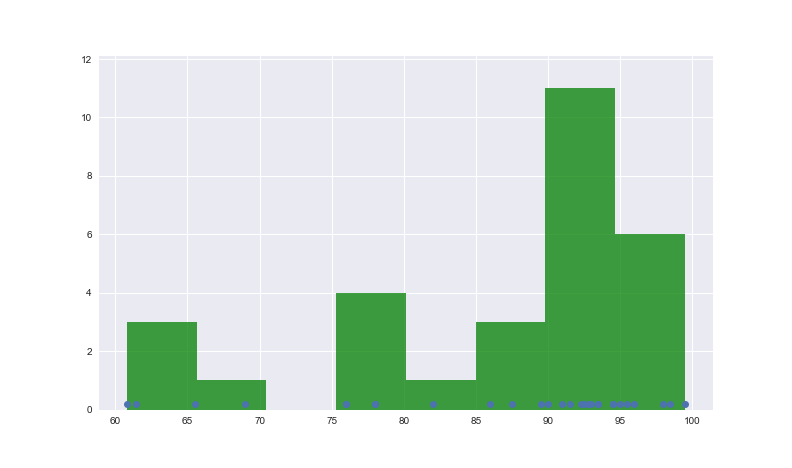
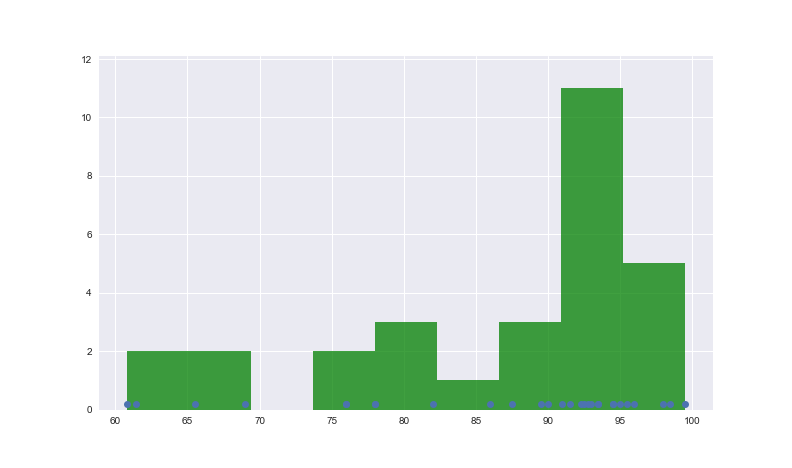
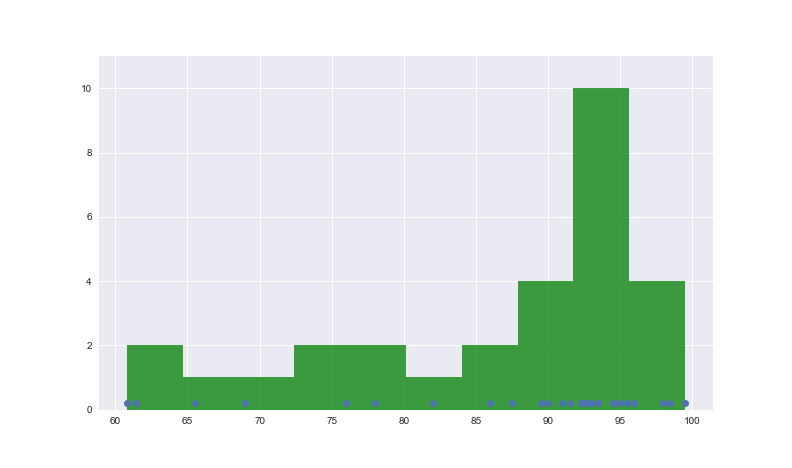
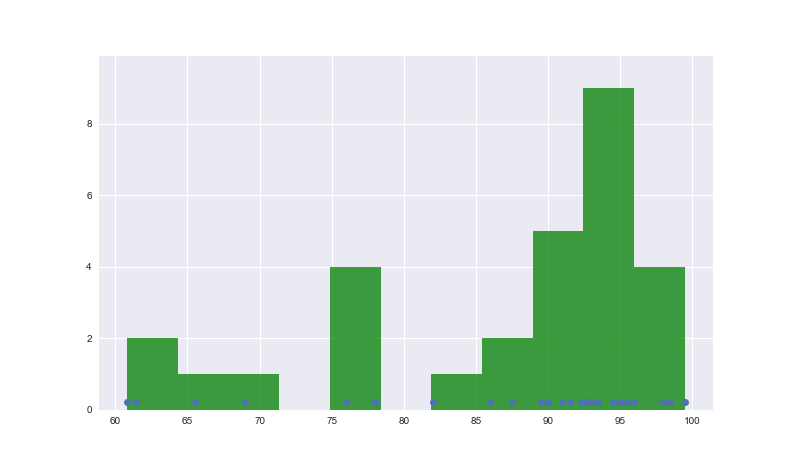
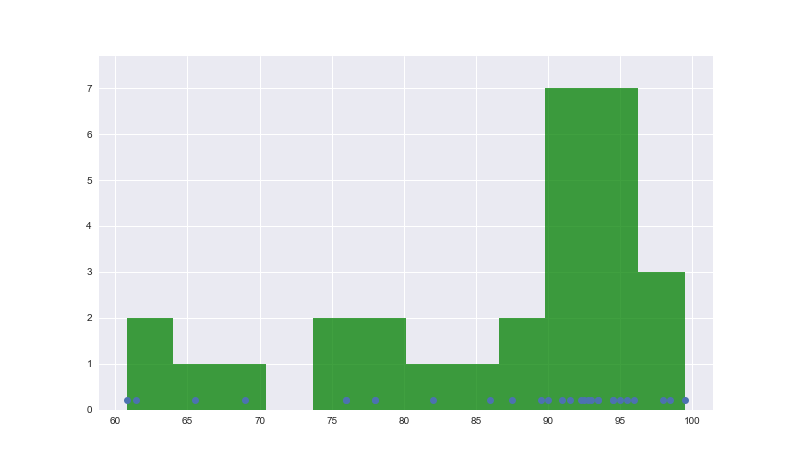
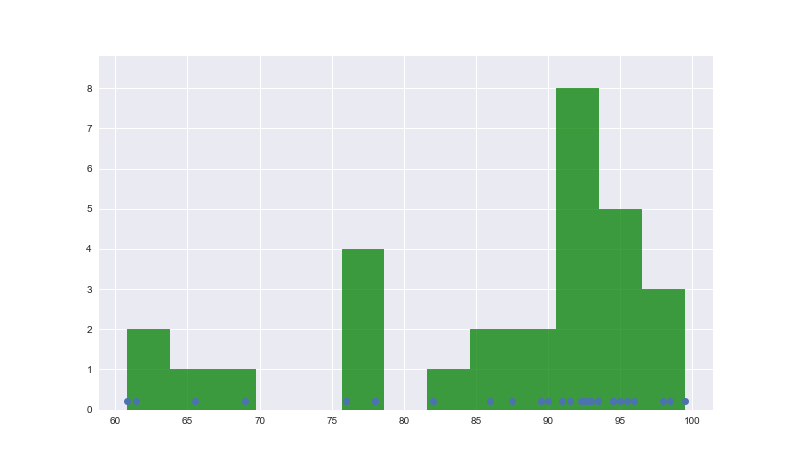
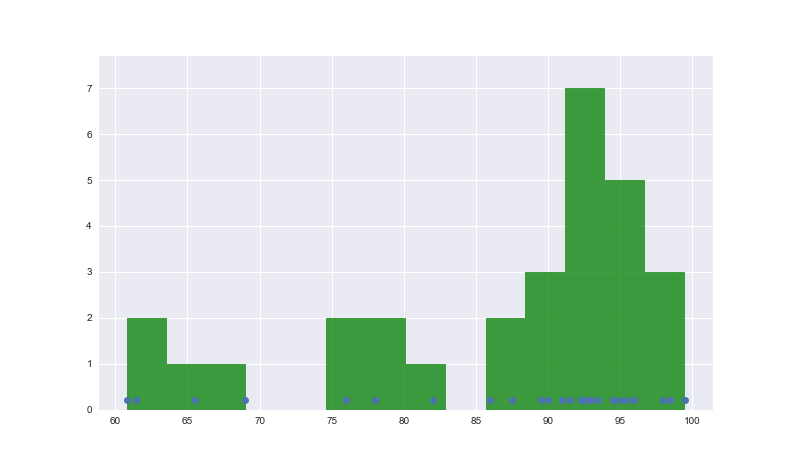
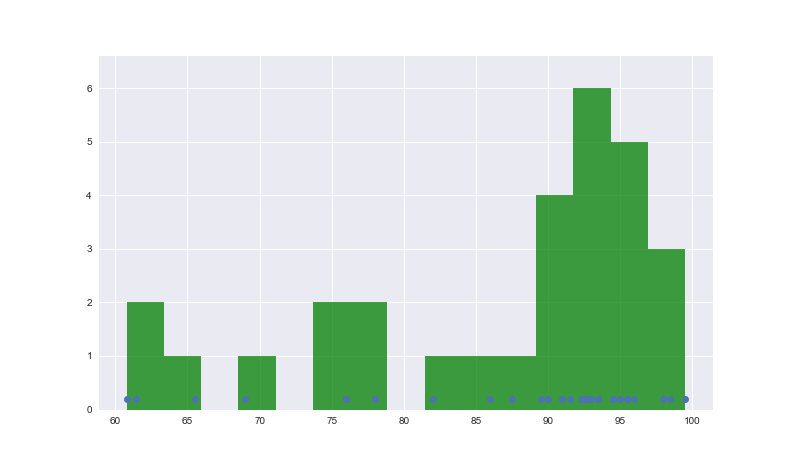
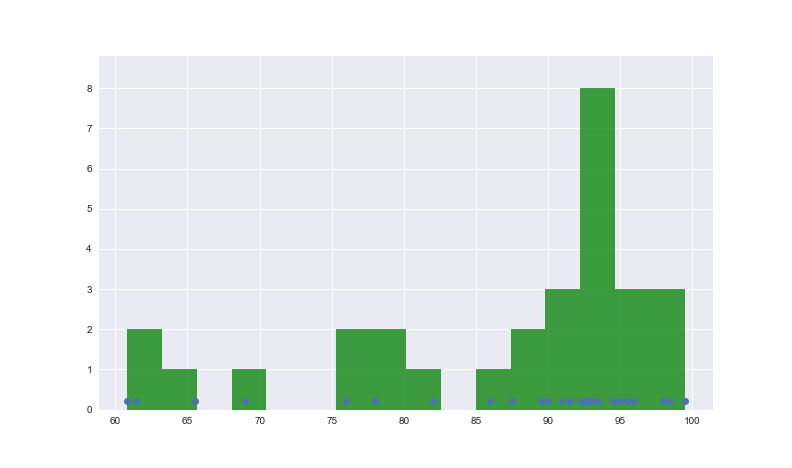
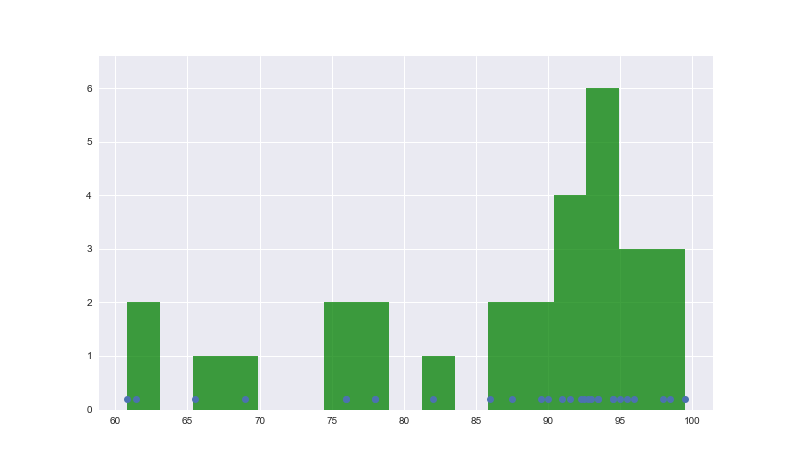
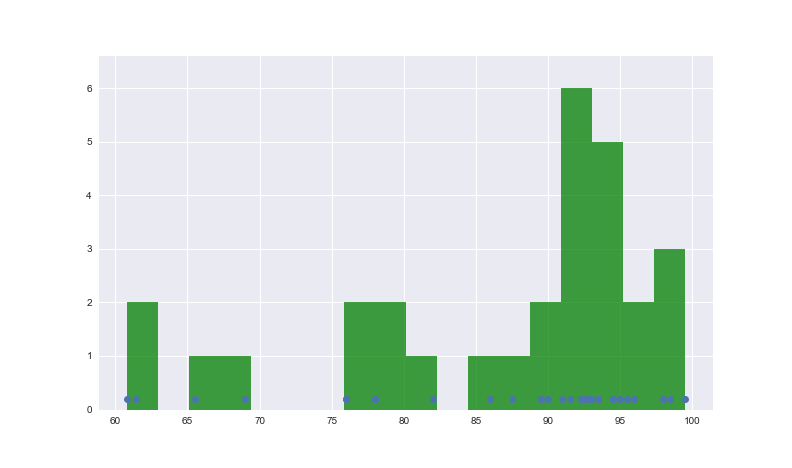
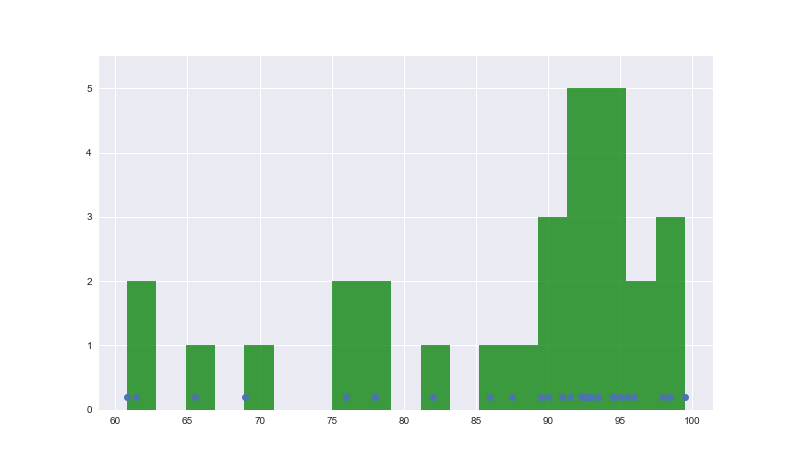
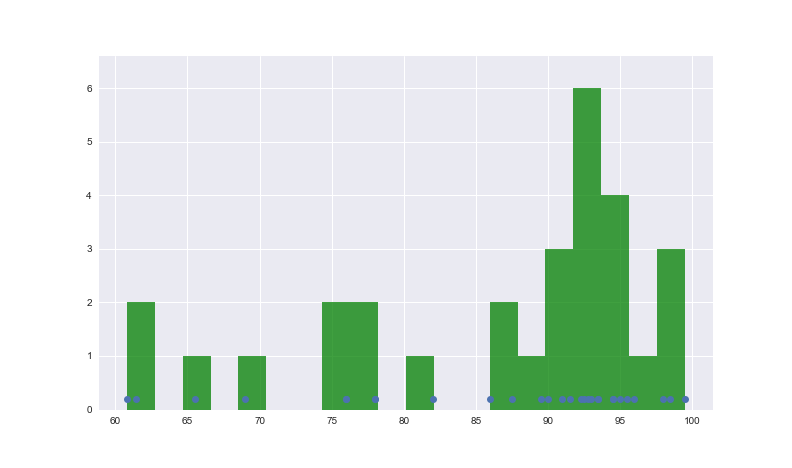
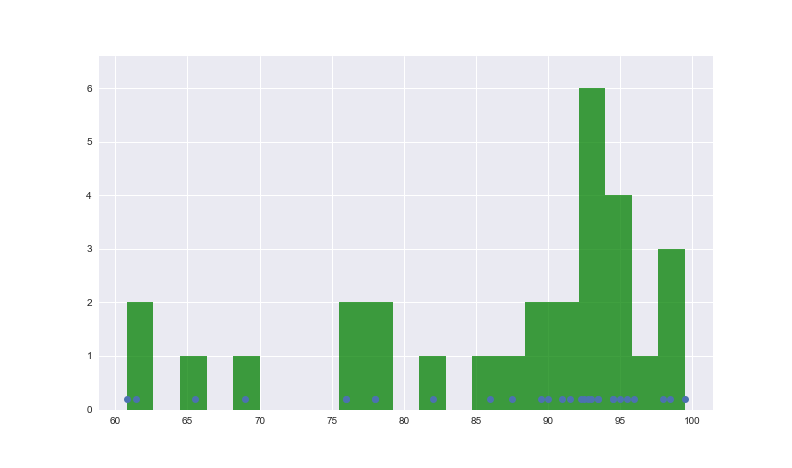
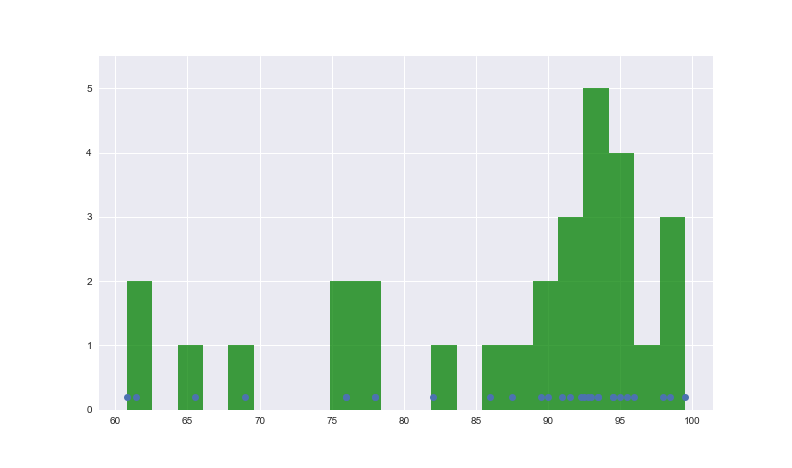
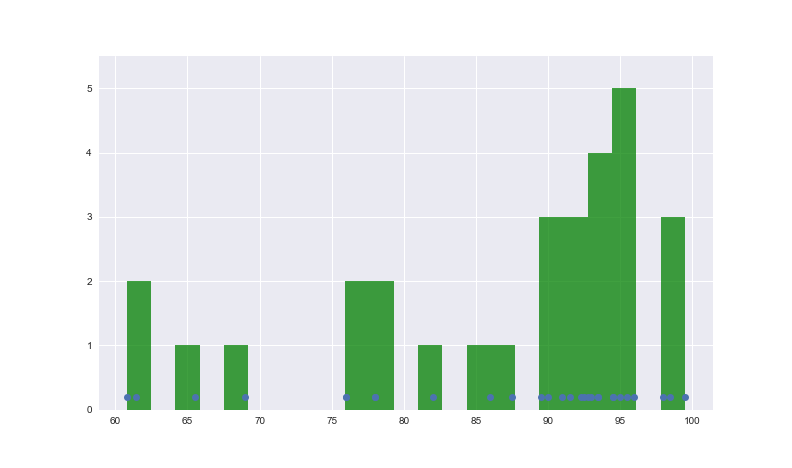
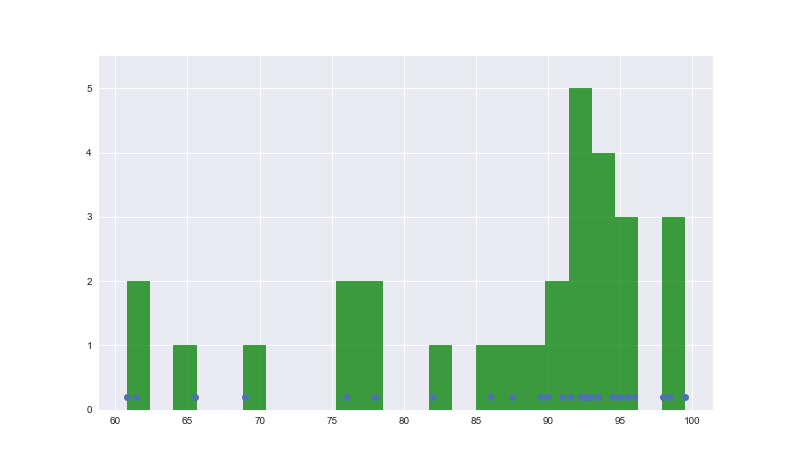
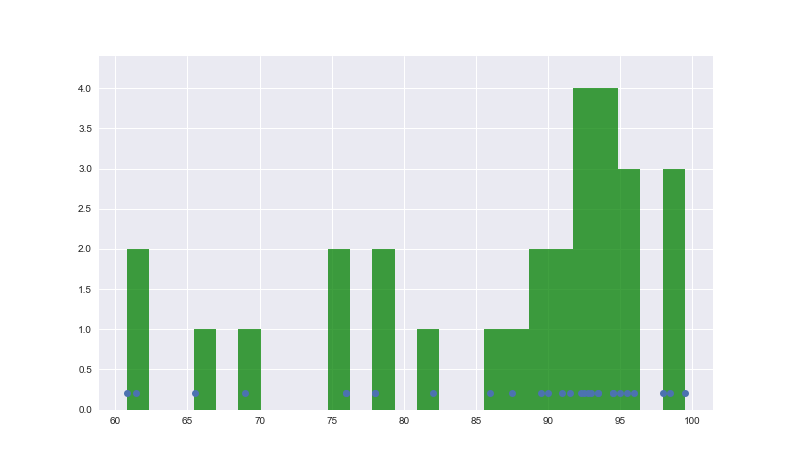
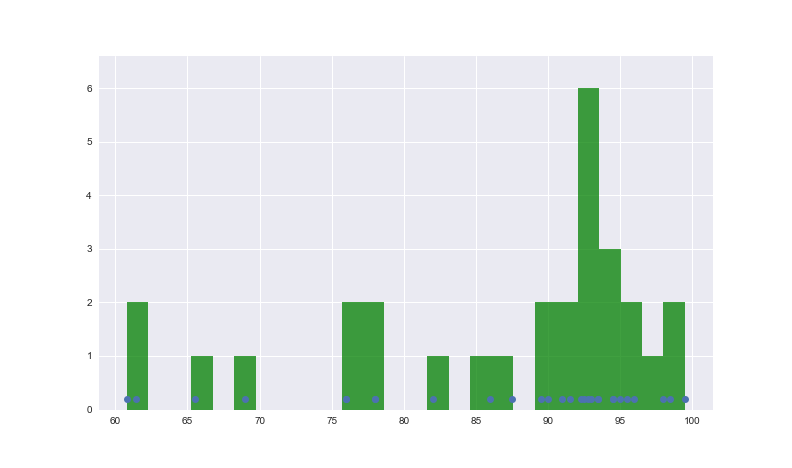
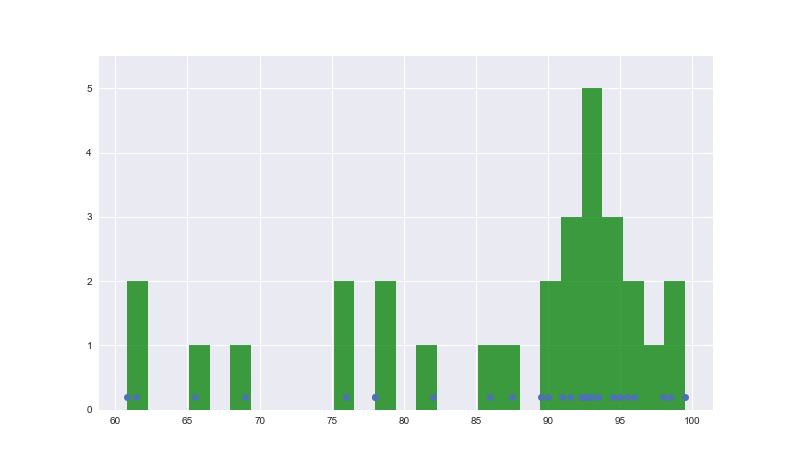
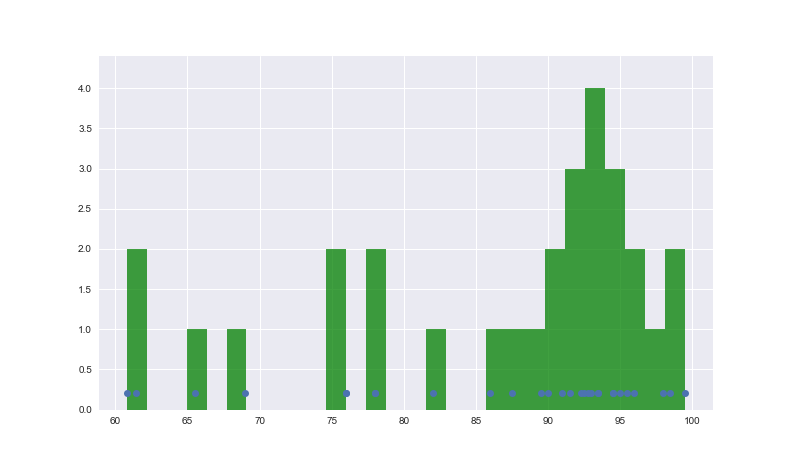

In [13]:
ani = getHistBinNumAni(grades)
display_animation(ani, default_mode='once')

So, obviously chosing the number of bins makes a huge difference in how we'd interpret the data.

### Where do the histogram bins start?

One of the other big problems with histograms, especially for relatively small data sets, is that you have to choose where the left edge of the first bin goes. Do you center the bin around the first group of points? Do you make the left edge match up with the left-most data point?

In [14]:
%pylab inline
def getHistBinOffsetAni(data,nbins=20,showpts=True): 
    offsets = np.linspace(-0.5,0.5,50)
    totalframes = len(offsets)
    fig = figure()
    ax = fig.gca()

    n, _bins, patches = plt.hist(data, nbins, normed=1, facecolor='green', alpha=0.0)
    if showpts:
        junk = plt.plot(data,0.2*np.ones_like(data),'bo')
    # Obnoxious: find max number in a bin ever
    nmax = 1
    for i in range(totalframes):
        dx = (data.max() - data.min())/nbins
        _bins = np.linspace(data.min() - dx + offsets[i]*dx, data.max()+dx + offsets[i]*dx,len(data)+1)
        n, bins = nphistogram(data, bins=_bins, normed=False)
        nmax = max(nmax,n.max())
                               
    def animate(i):
        dx = (data.max() - data.min())/nbins
        # bins go from min - dx to max + dx, then offset.
        _bins = np.linspace(data.min() - dx + offsets[i]*dx, data.max()+dx + offsets[i]*dx,nbins)
        n, bins = nphistogram(data, bins = _bins, normed=False)
        ax.set_ylim(0,1.1*nmax)
        #ax.set_xlim(data.min()-dx,data.max()+dx)
        binwidth = bins[1] - bins[0]
        ax.set_xlim(bins[0]-binwidth,bins[-1] + binwidth)

        for j in range(len(n)):
            #continue
            rect,h = patches[j],n[j]
            #print h.max()
            x = bins[j]
            w = bins[j+1] - x
            rect.set_height(h)
            rect.set_x(x)
            rect.set_width(w)
            rect.set_alpha(0.75)
        fig.canvas.draw()    
    ani = animation.FuncAnimation(fig, animate, totalframes, repeat=False)
    return ani

Populating the interactive namespace from numpy and matplotlib



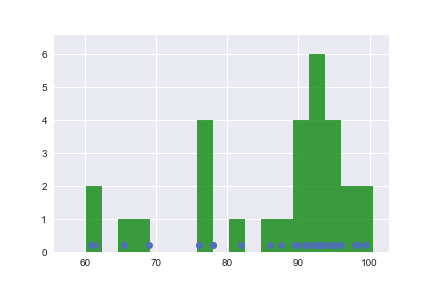
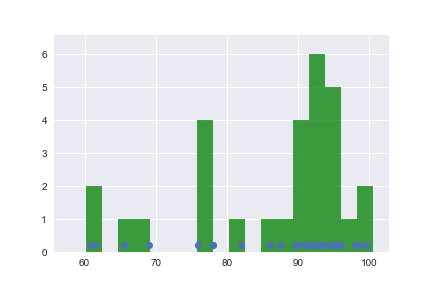
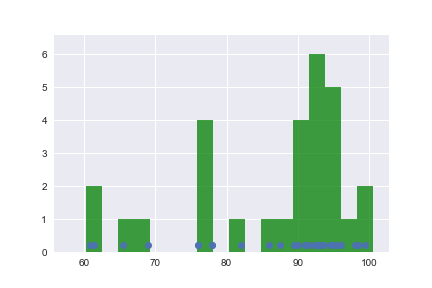
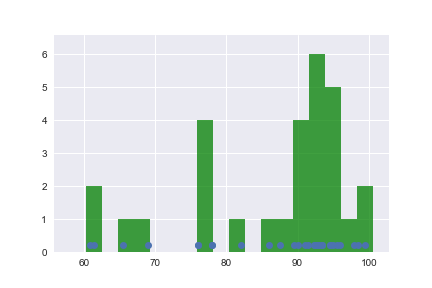
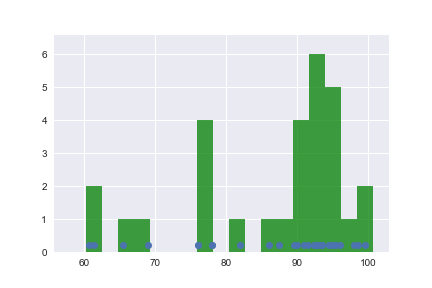
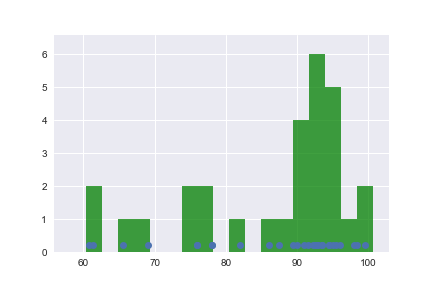
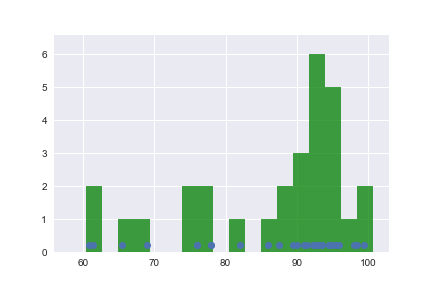
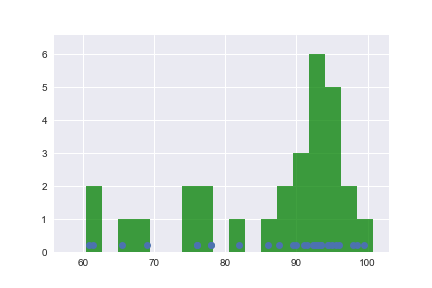
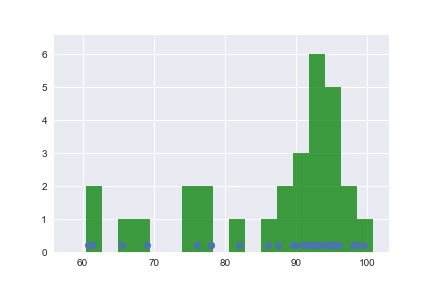
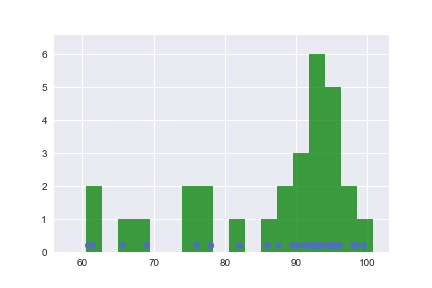
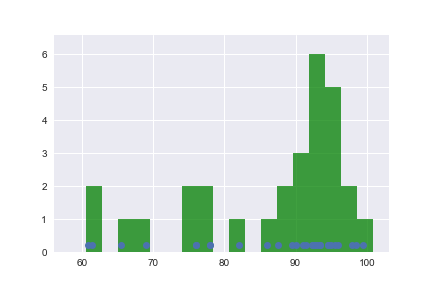
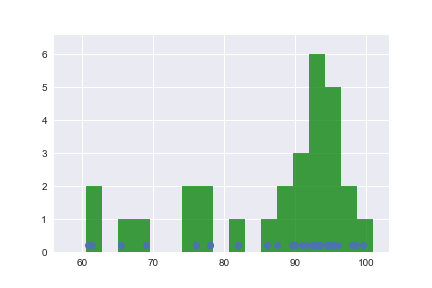
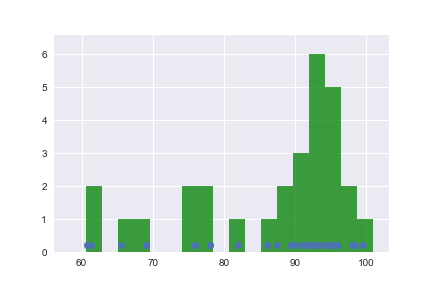
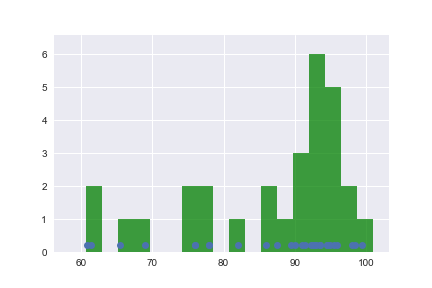
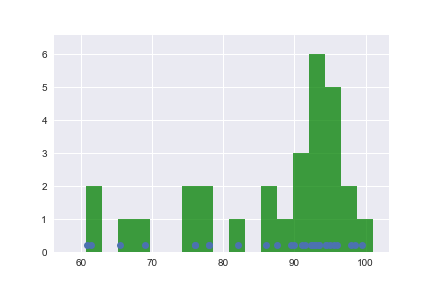
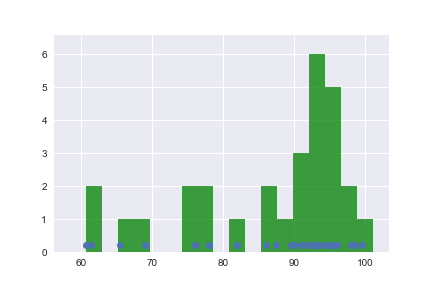
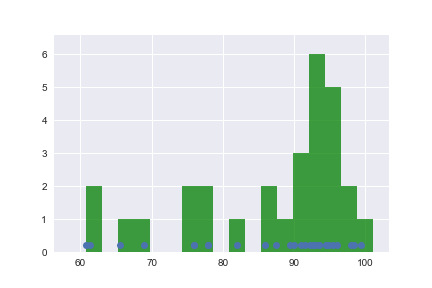
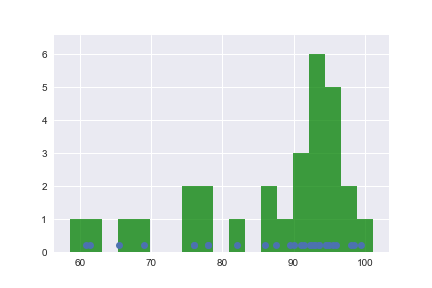
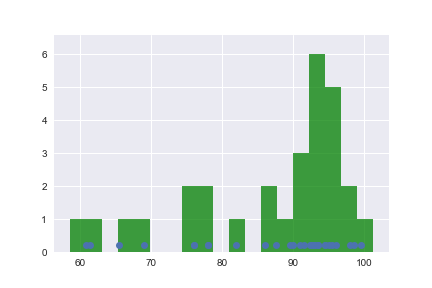
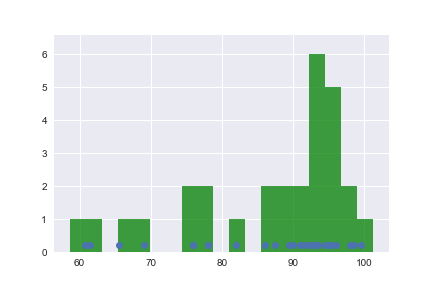
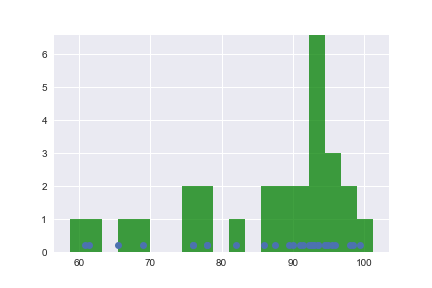
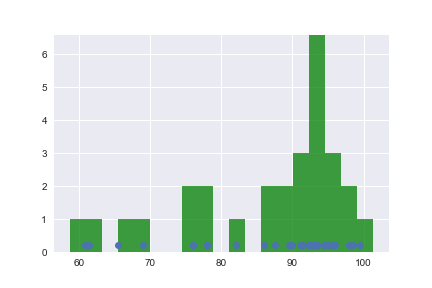
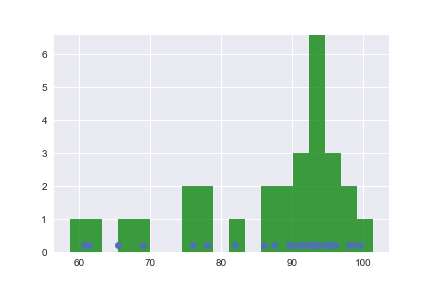
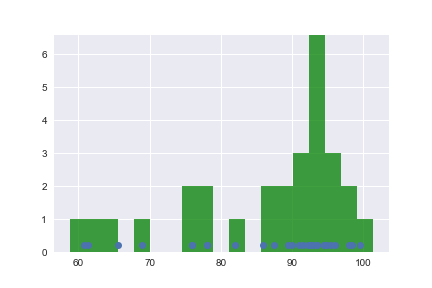
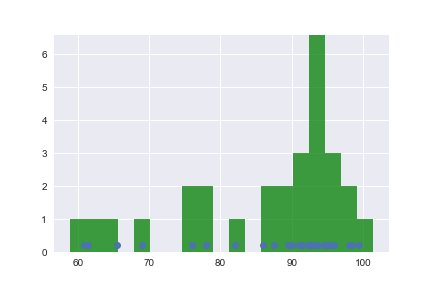
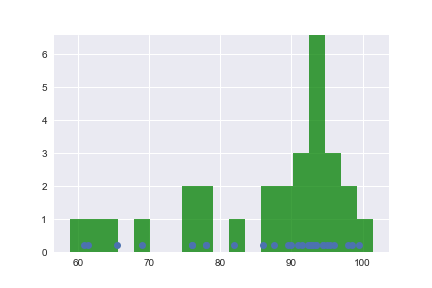
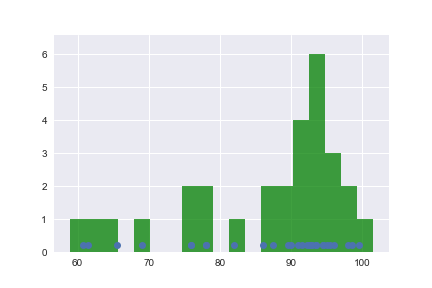
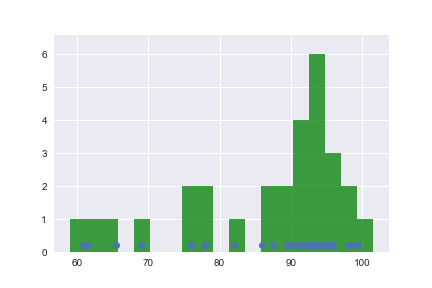
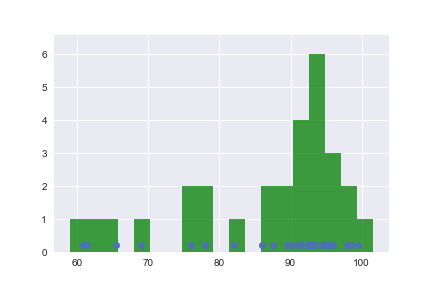
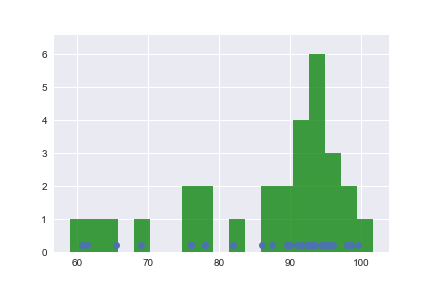
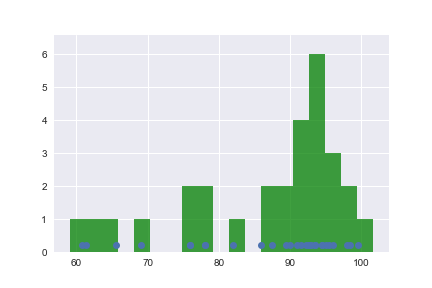
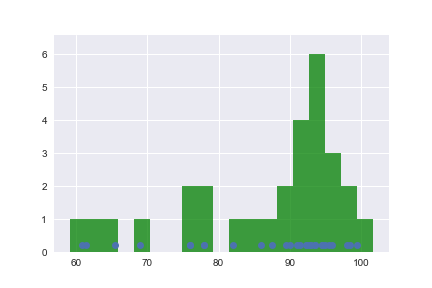
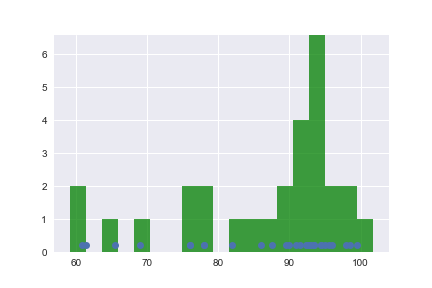
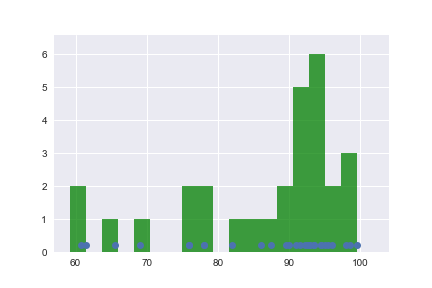
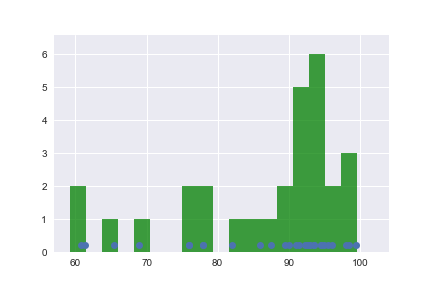
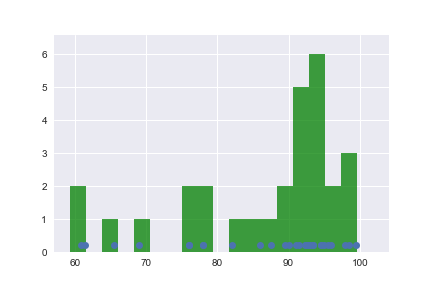
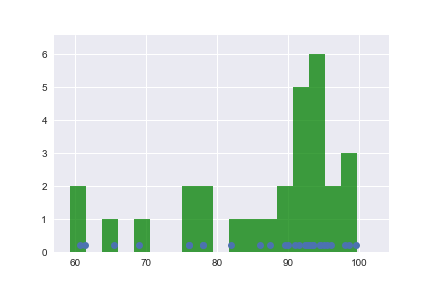
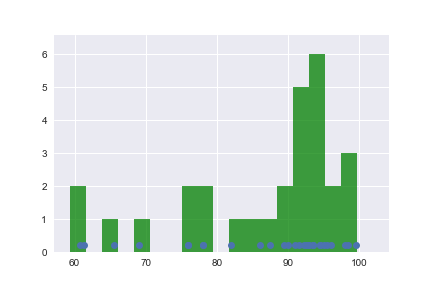
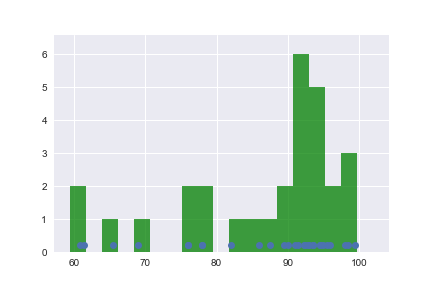
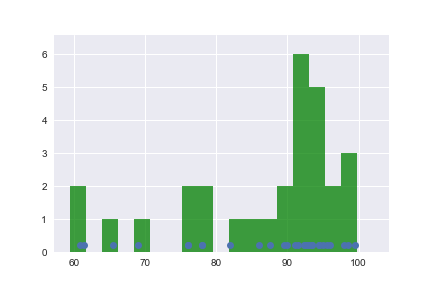
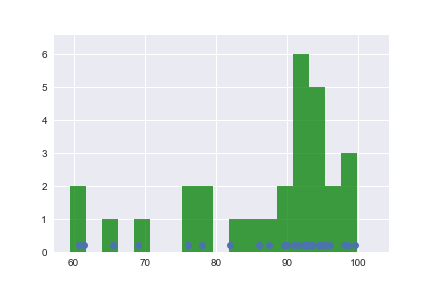
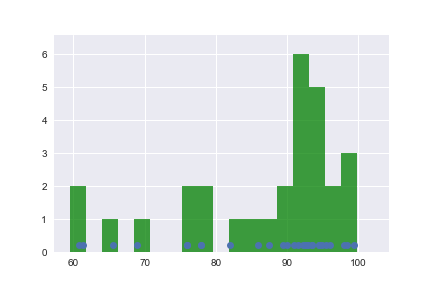
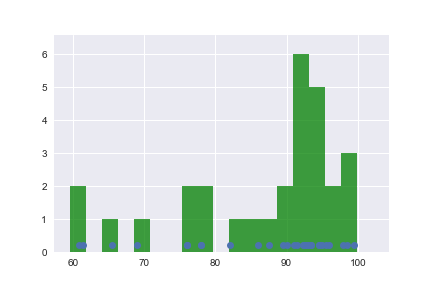
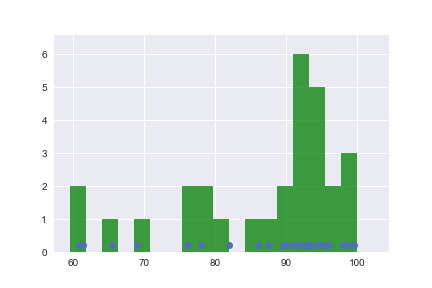
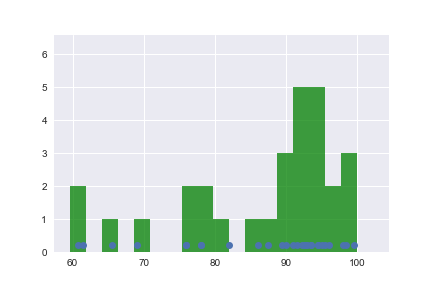
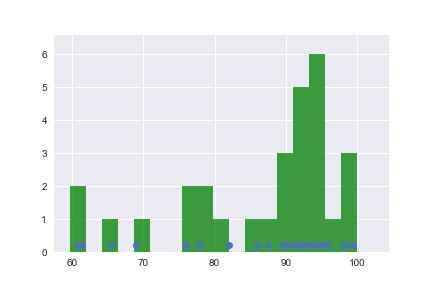
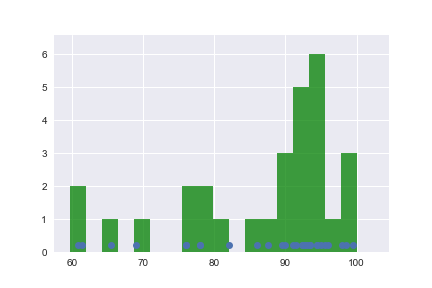
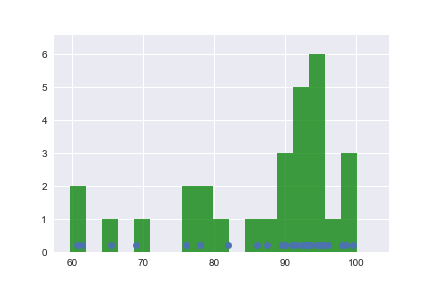
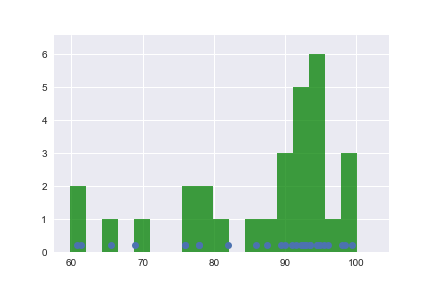
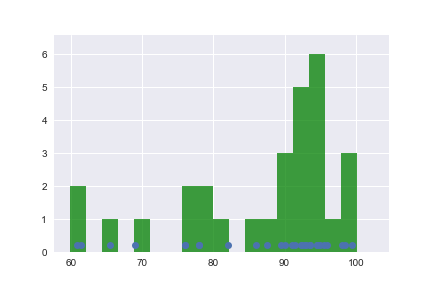

In [15]:
ani = getHistBinOffsetAni(grades)
display_animation(ani, default_mode='once')

KDE (Kernel Density Estimation) is a very helpful alternative to histograms. The basic idea is that, if you're looking at our grades dataset, you might choose to represent each point as a rectangle:

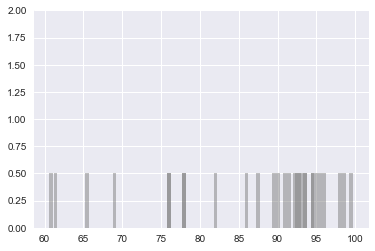

In [16]:
bar(grades,np.ones_like(grades)*0.5,width=0.5,facecolor='grey',alpha=0.5)
junk = ylim(0, 2.0)

not so interesting so far, but what do we do when the rectangles get wide enough that they start to overlap?Instead of just letting them run over each other like

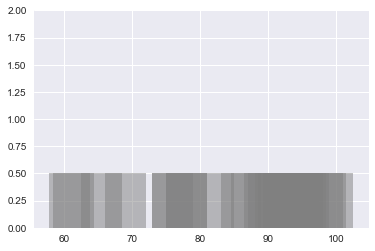

In [17]:
bar(grades,np.ones_like(grades)*0.5,width=6,facecolor='grey',alpha=0.5)
junk = ylim(0, 2.0)

and instead of coloring the overlap regions darker grey, we add the rectangles together.

So, since each of the rectangles has height 0.5 in the above example, the dark grey regions should really have height 1.0. This idea is called "kernel density estimation" (KDE), and the rectangle that we're using is called the "kernel". If we wanted to draw a different shape at each point, we'd do so by specifying a different kernel (perhaps a bell curve, or a triangle). 

KDE, rectangular kernel
-----------------------

Now let's try KDE with a rectangular kernel. This time, using `getKdeRectAni` function:

In [18]:
def getKdeRectAni(data,totalframes=100,showpts=True):
    #ion()
    totalframes = 100
    fig = figure()
    
    # Let's say 10000 points for the whole thing
    width = data.max() - data.min()
    left, right = data.min(), data.min() + (width)
    left, right = left - (totalframes/100)*width, right + (totalframes/100)*width
    
    ax = axes(xlim=(left,right),ylim=(-0.1,2))
    line, = ax.plot([], [], lw=2)
    
    numpts = 10000
    x = np.linspace(left,right,numpts)
    
    dx = (right-left)/(numpts-1)
    
    def init():
        line.set_data([], [])
        return line,

    if showpts:
        junk = plt.plot(data,0.2*ones_like(data),'bo')
    
    def animate(i):
        y = zeros(10000)
        kernelwidth = .02*width*(i+1)
        kernelpts = int(kernelwidth/dx)
        kernel = ones(kernelpts)
        for d in data:
            center = d - left
            centerpts = int(center/dx)
            bottom = centerpts - int(kernelpts/2)
            top = centerpts+int(kernelpts/2)
            if top - bottom < kernelpts: top = top + 1
            if top - bottom > kernelpts: top = top - 1
            y[bottom:top] += kernel
        line.set_data(x,y)
        ax.set_ylim(0,1.1*y.max())
        ax.set_xlim(x[where(y>0)[0][0]],x[where(y>0)[0][-1]])
    
        #sleep(0.1)
        return line,
    ani = animation.FuncAnimation(fig, animate, init_func=init,
                                  frames=totalframes, repeat=False)
    return ani


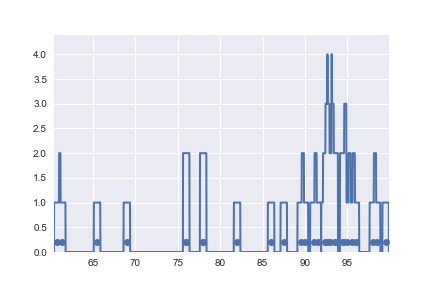
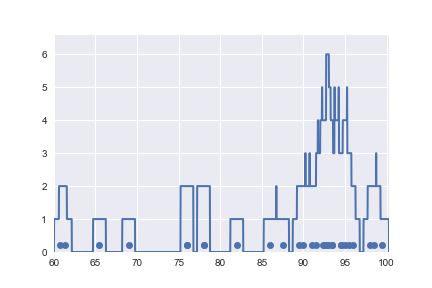
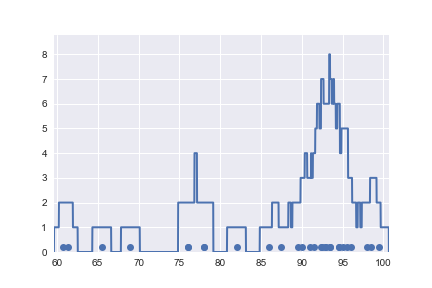
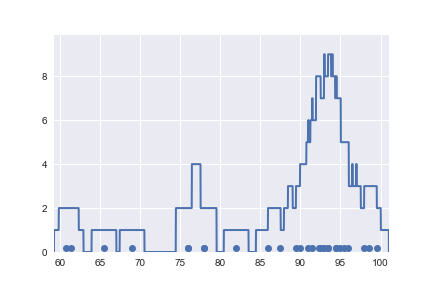
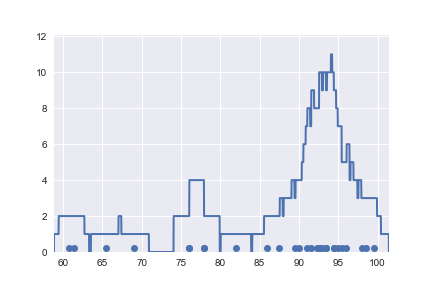
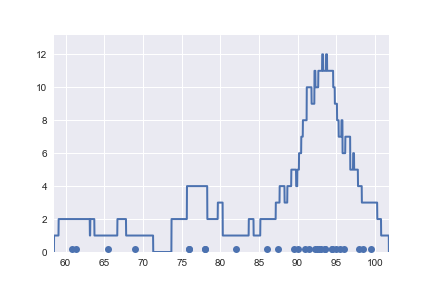
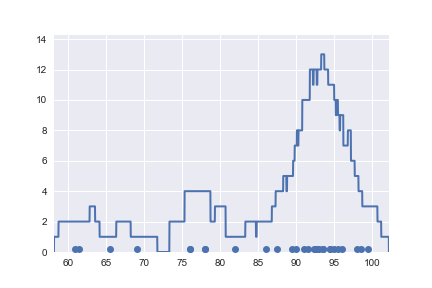
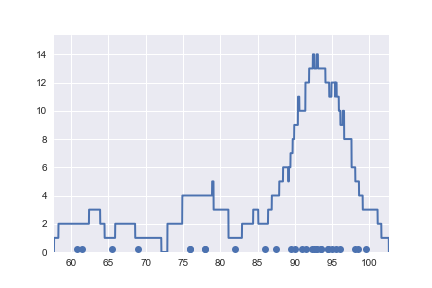
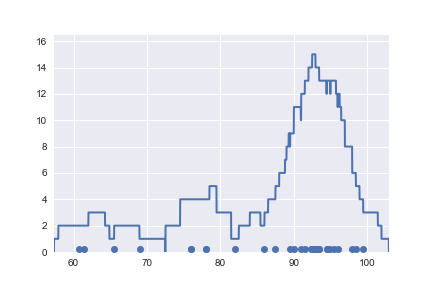
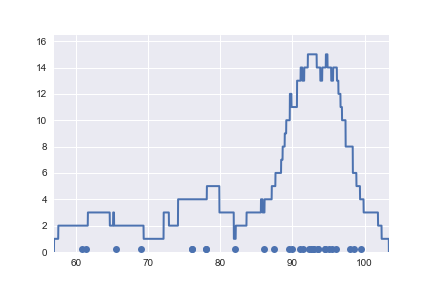
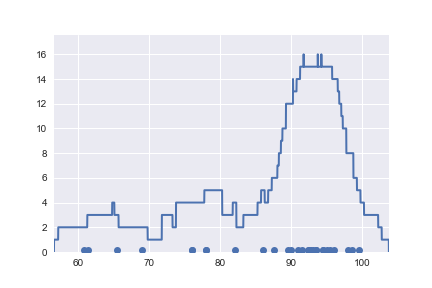
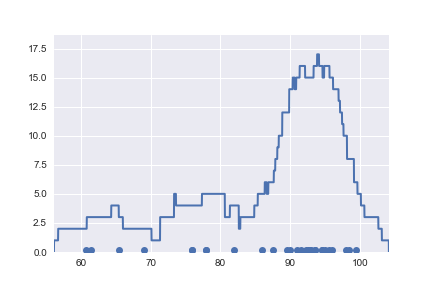
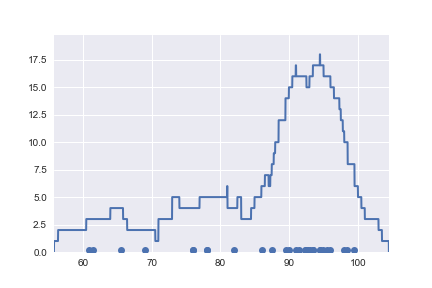
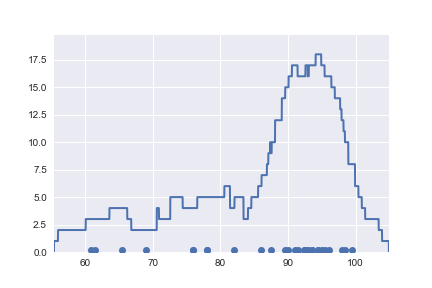
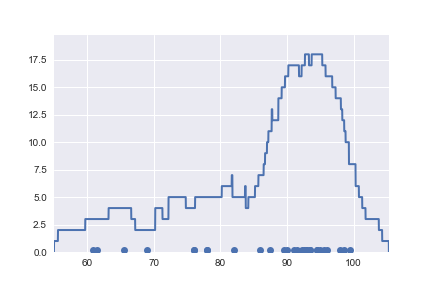
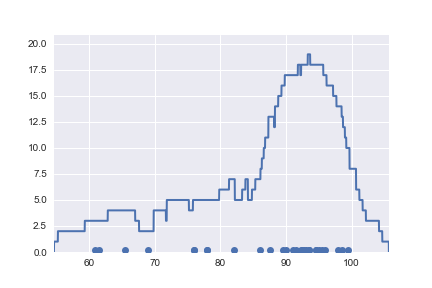
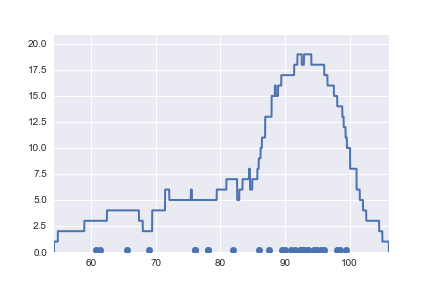
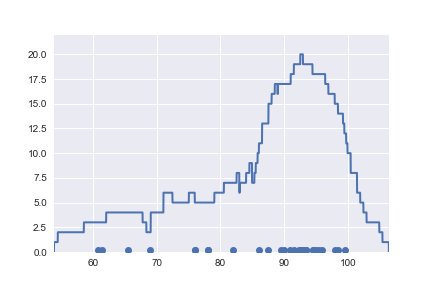
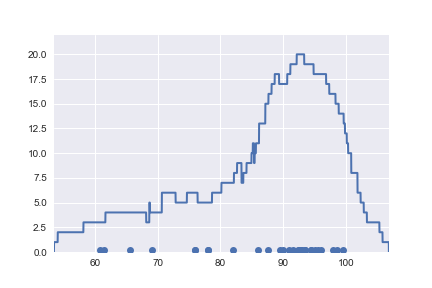
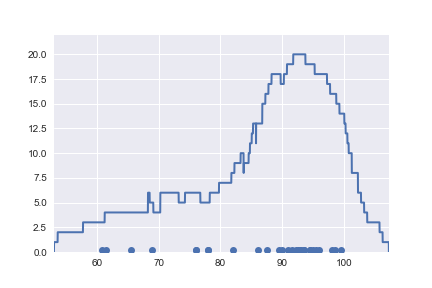
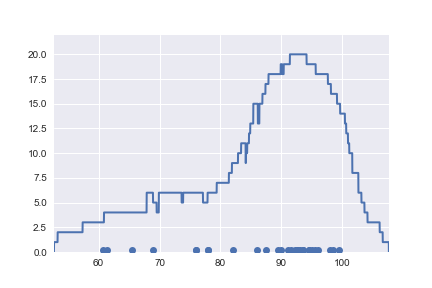
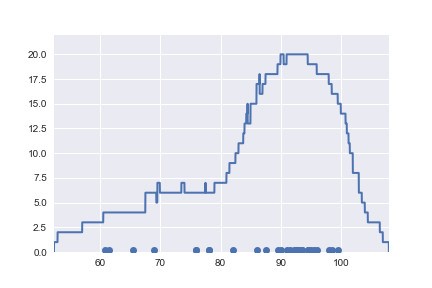
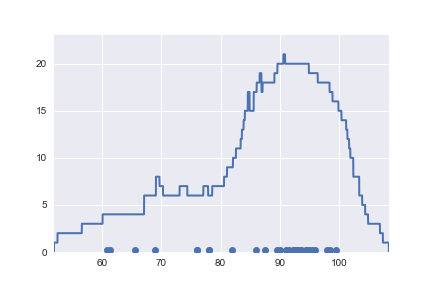
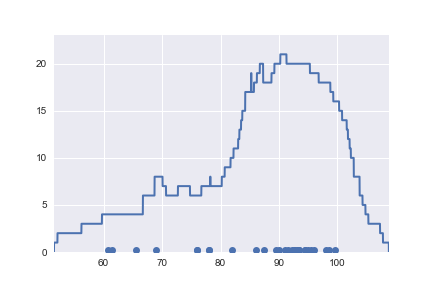
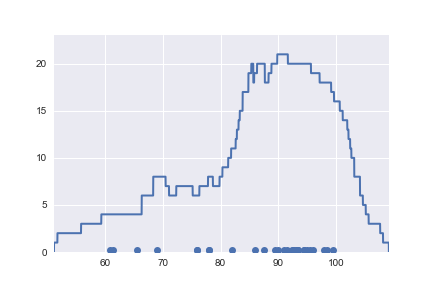
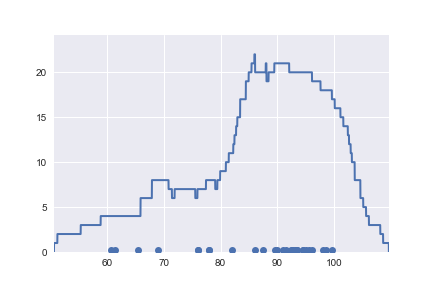
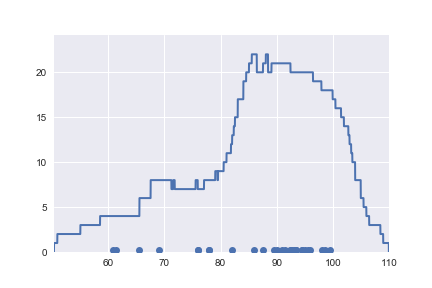
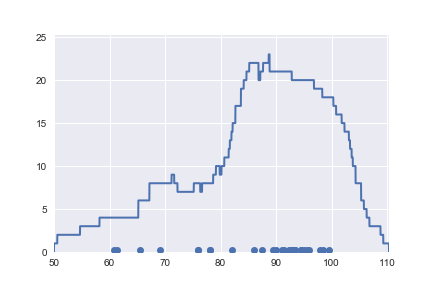
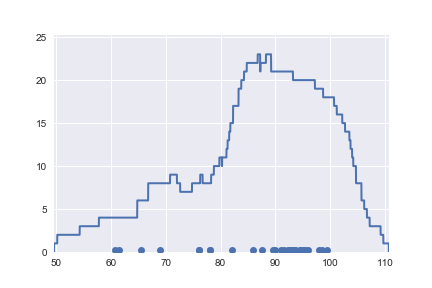
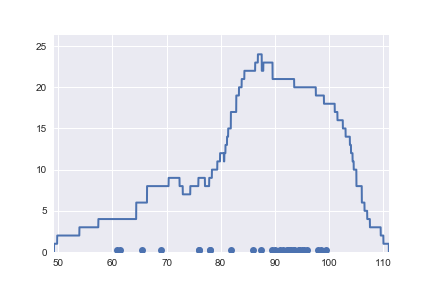
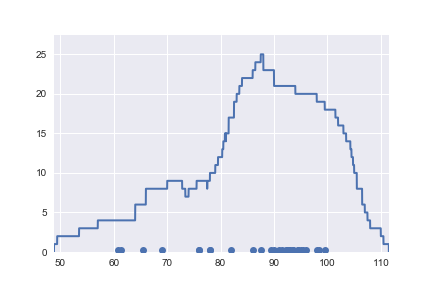
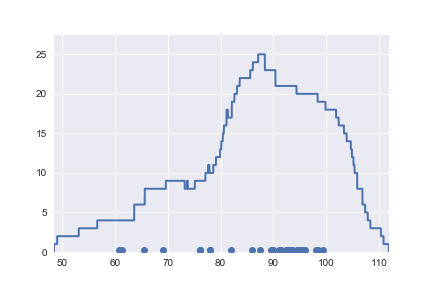
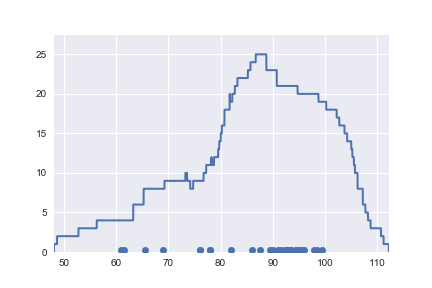
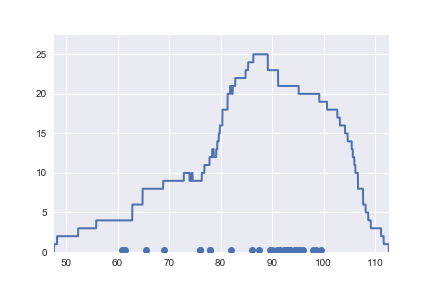
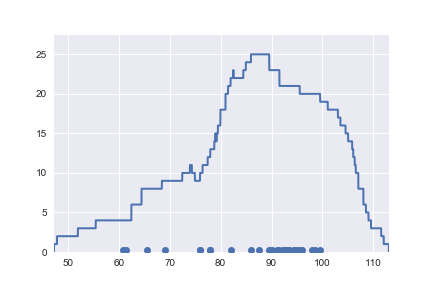
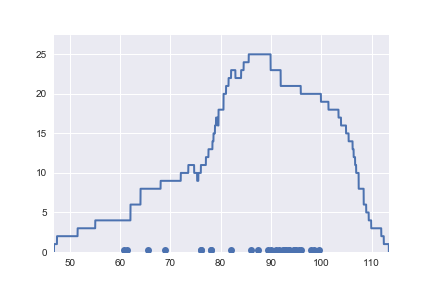
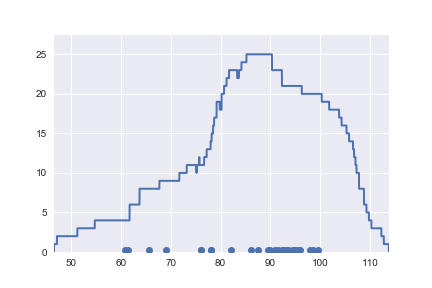
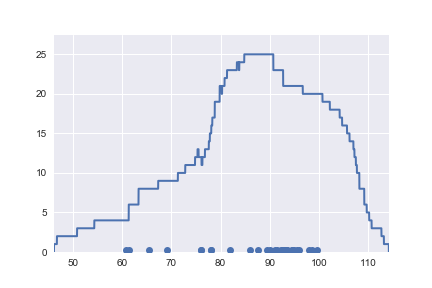
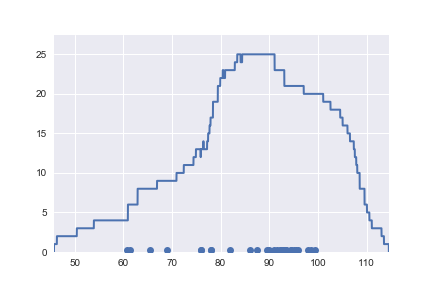
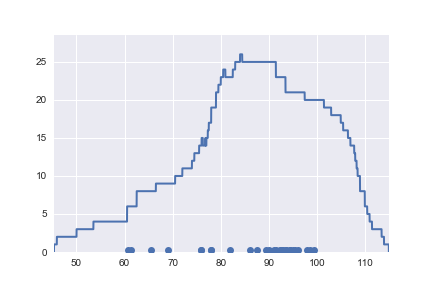
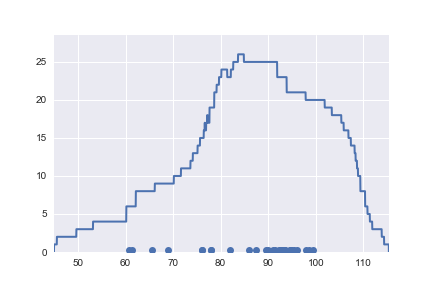
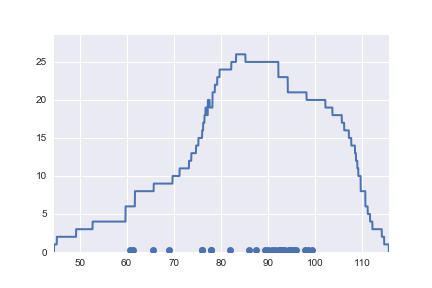
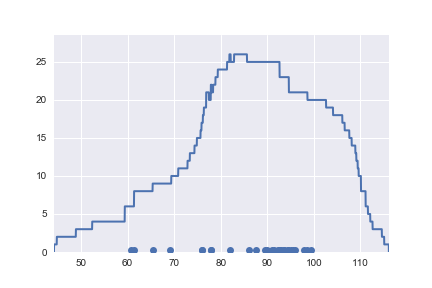
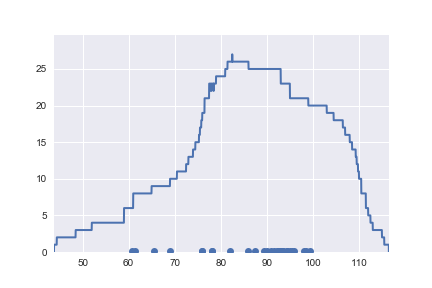
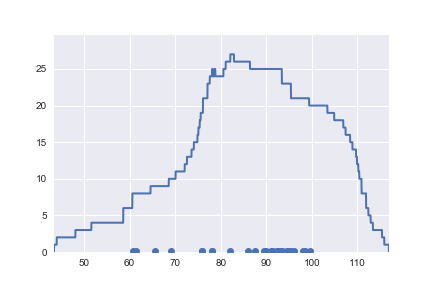
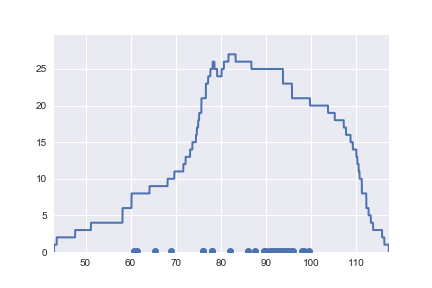
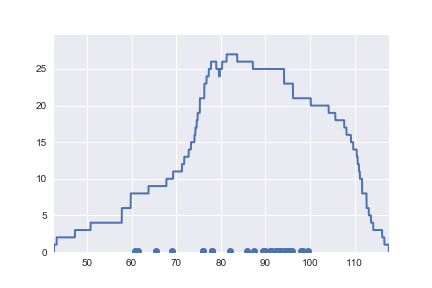
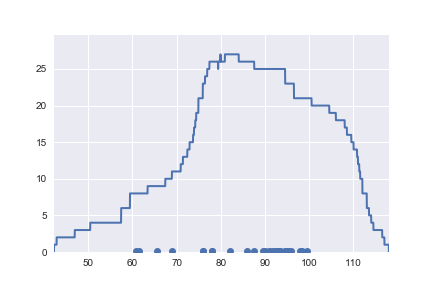
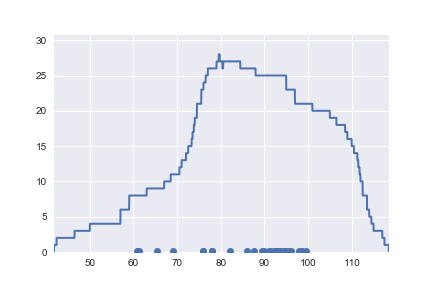
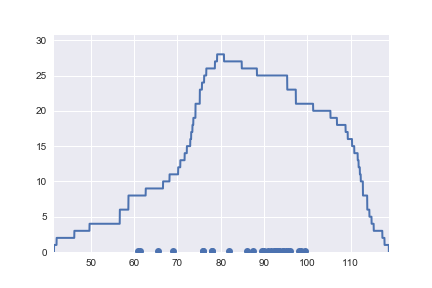
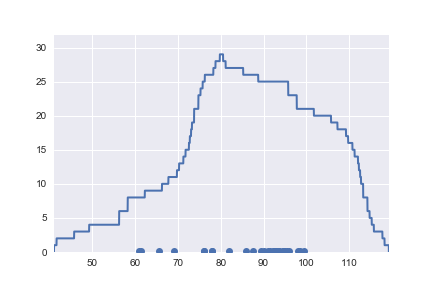
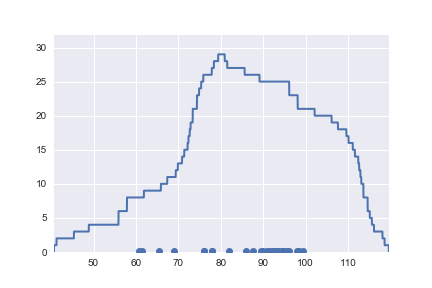
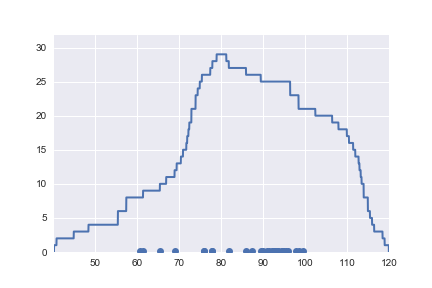
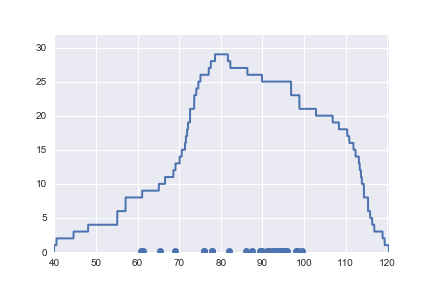
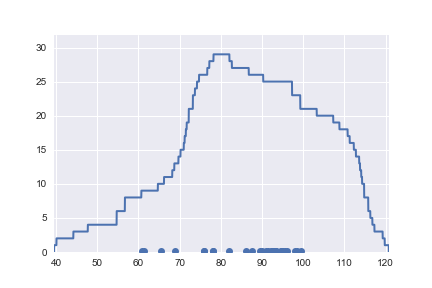
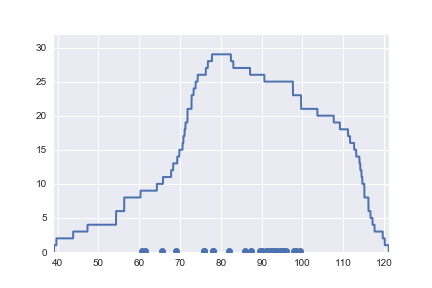
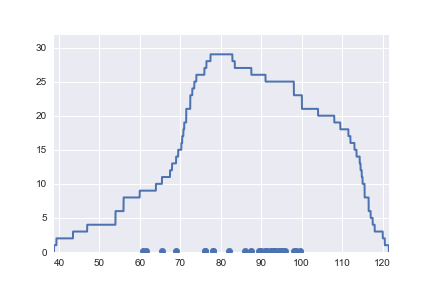
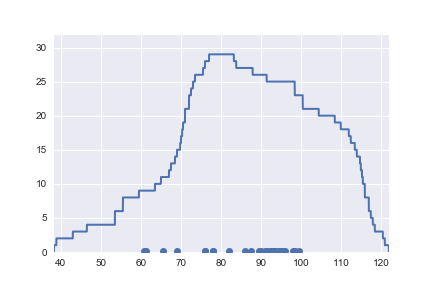
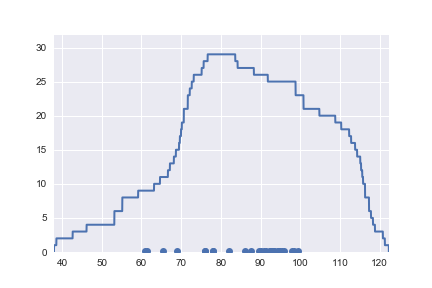
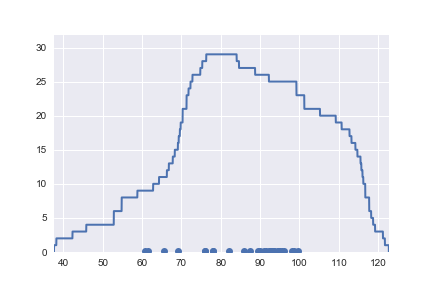
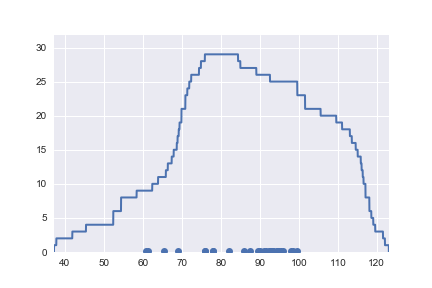
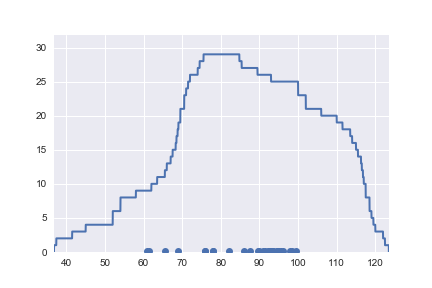
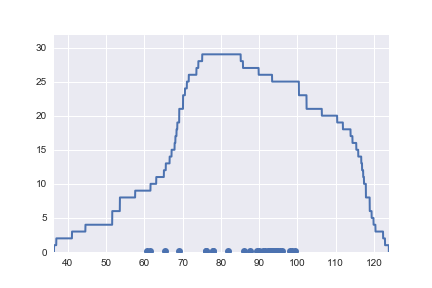
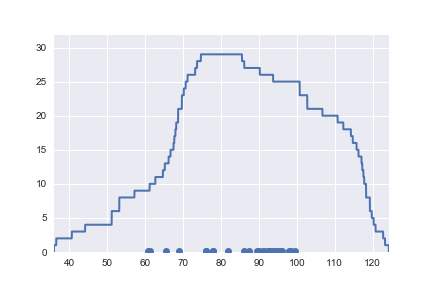
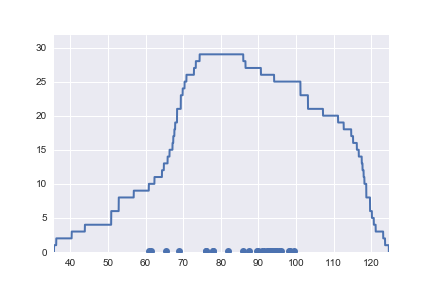
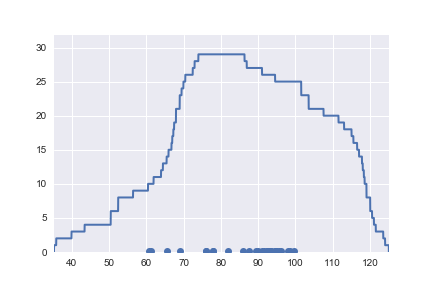
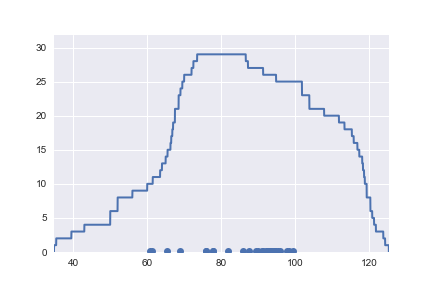
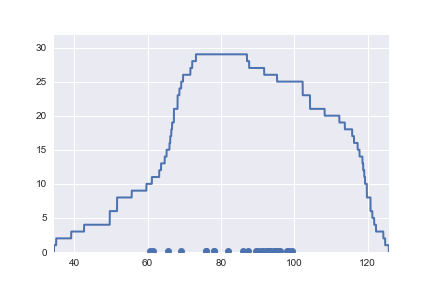
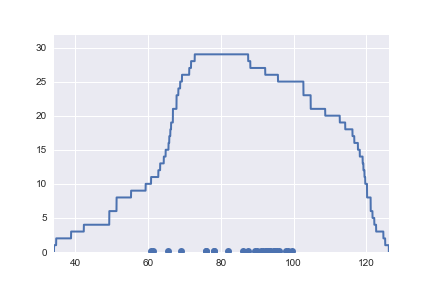
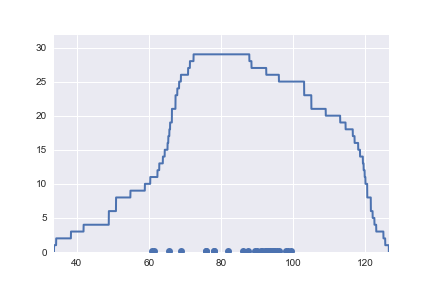
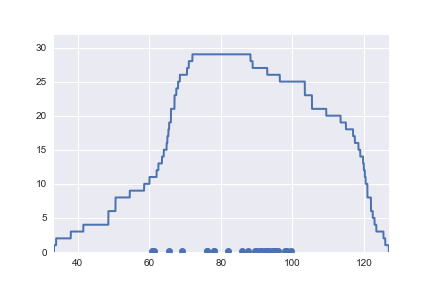
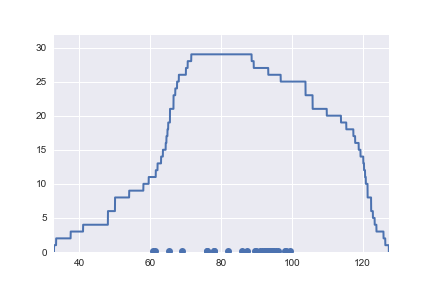
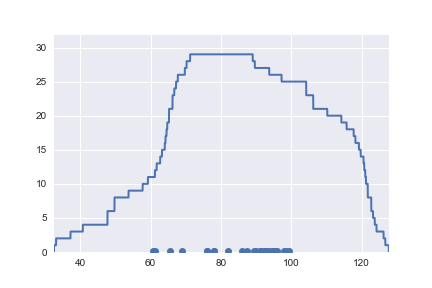
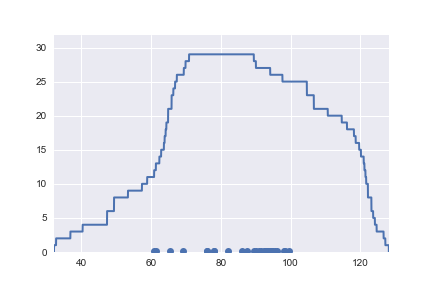
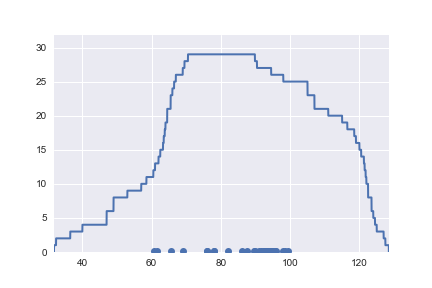
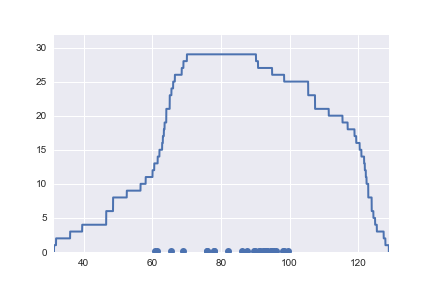
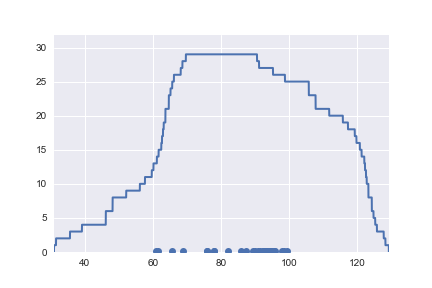
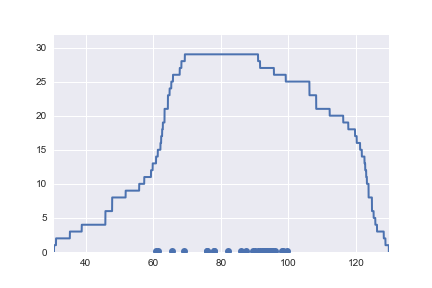
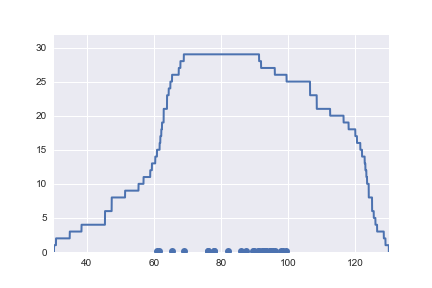
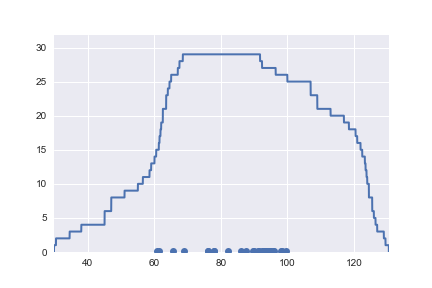
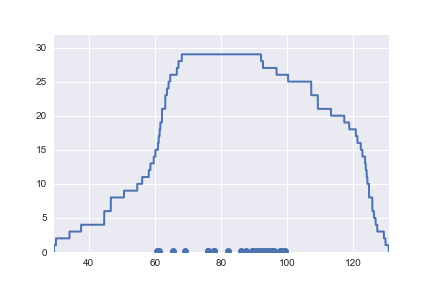
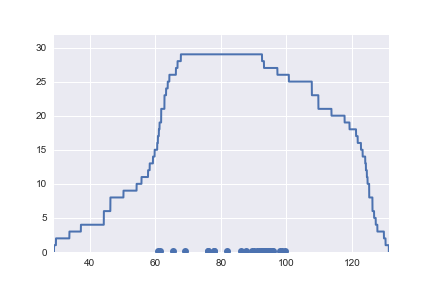
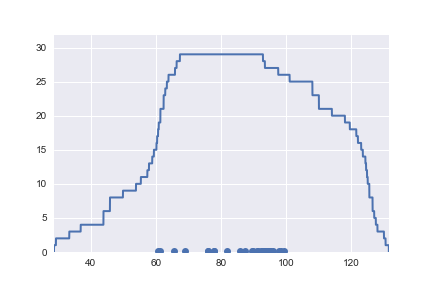
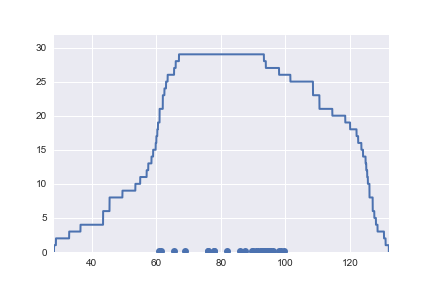
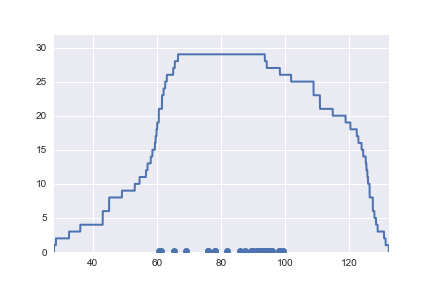
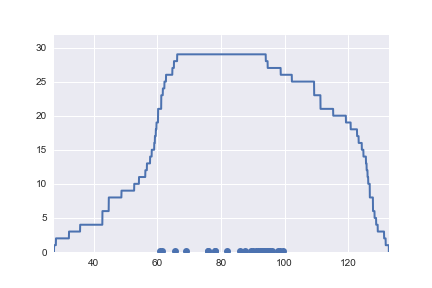
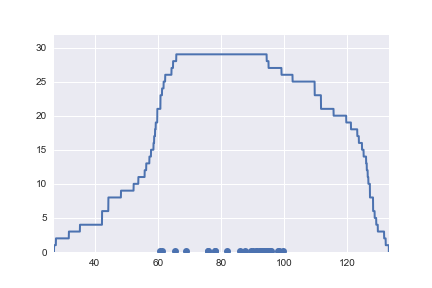
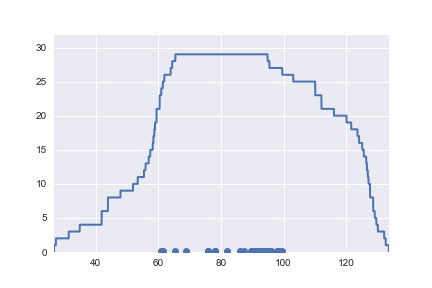
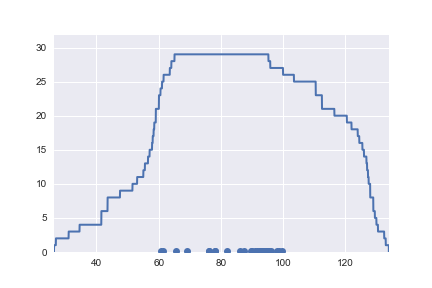
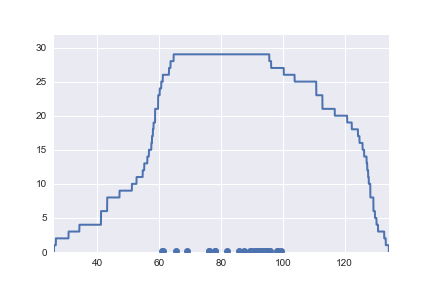
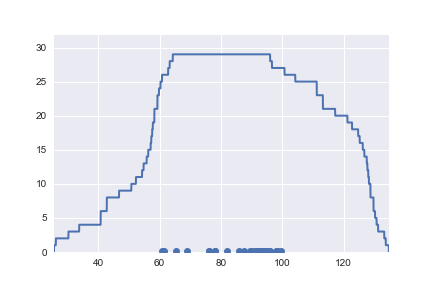
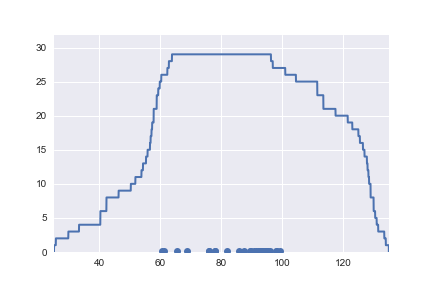
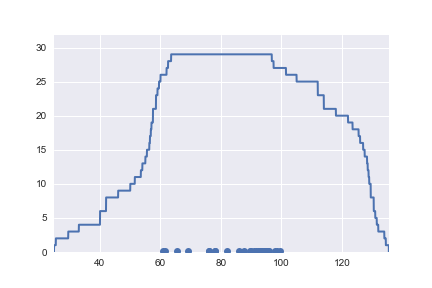
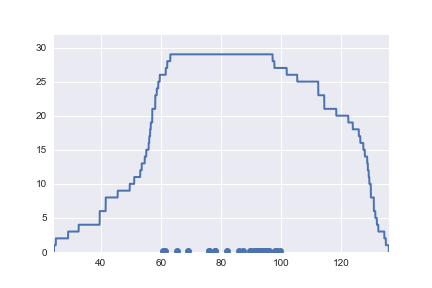
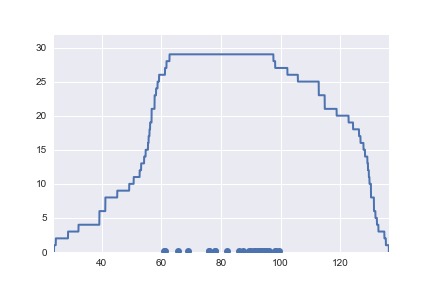
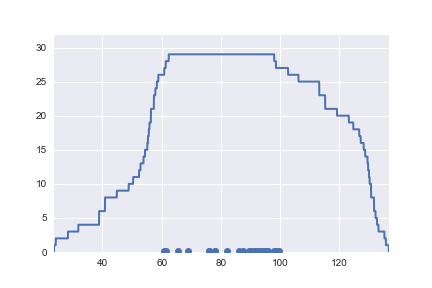
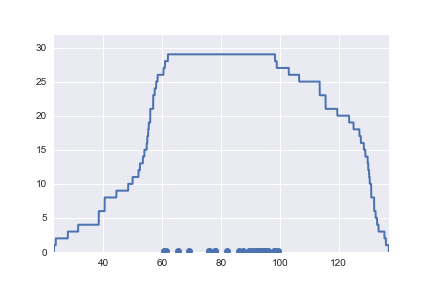
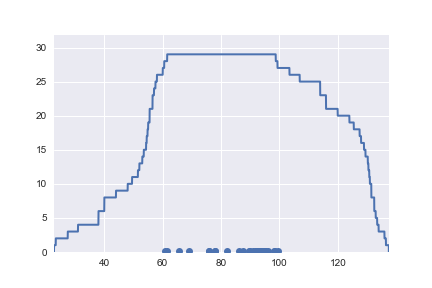
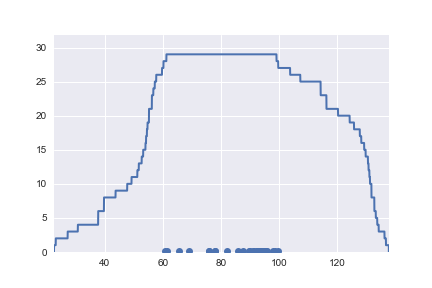
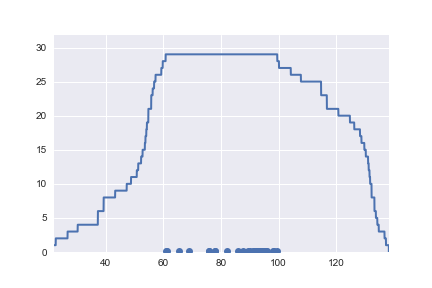

In [19]:
ani = getKdeRectAni(grades)
display_animation(ani, default_mode='once')

 Note what happens when you make it big enough that the rectangles start to overlap. By tuning the width of the rectangles (bandwidth), we can tune how finely or coarsely we're looking at the data.

In my view, there's a sweet spot right around 1/9 of the way across the slider where there are three distinct peaks. It looks very much like a trimodal distribution to me. So far, this isn't totally automatic; we have to pick the width of our kernel, but it's obvious that KDE can give us a much better view of the underlying data than histograms.

KDE, Gaussian kernel
--------------------


As mentioned above, we can use a different kernel.

In [22]:
from sklearn.neighbors import KernelDensity
def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()

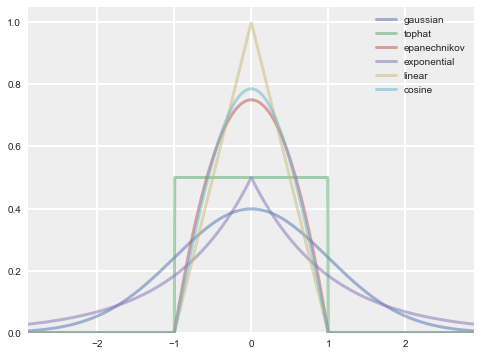

In [24]:
plot_kernels()

One of the most common kernels to use is a [Gaussian](http://en.wikipedia.org/wiki/Gaussian_function). Using `getKdeGaussianAni` function:

In [25]:
from numpy import sqrt, pi, exp

def getKdeGaussianAni(data,totalframes=100, showpts=True):
    fig = figure()
    
    # Let's say 10000 points for the whole thing
    width = data.max() - data.min()
    left, right = data.min(), data.min() + (width)
    left, right = left - (totalframes/100)*width, right + (totalframes/100)*width
    
    ax = axes(xlim=(left,right),ylim=(-0.1,2))
    line, = ax.plot([], [], lw=2)
    if showpts:
        junk = plot(data,ones_like(data)*0.1,'go')

    
    numpts = 10000
    x = linspace(left,right,numpts)
    
    dx = (right-left)/(numpts-1)
    
    def init():
        line.set_data([], [])
        return line,
    
    def gaussian(x,sigma,mu):
        # Why isn't this defined somewhere?! It must be!
        return (1/sqrt(2*pi*sigma**2)) *  exp(-((x-mu)**2)/(2*sigma**2))
    
    def animate(i):
        y = zeros(10000)
        kernelwidth = .02*width*(i+1)
        kernelpts = int(kernelwidth/dx)
        kernel = gaussian(linspace(-3,3,kernelpts),1,0)
        #kernel = ones(kernelpts)
        for d in data:
            center = d - left
            centerpts = int(center/dx)
            bottom = centerpts - int(kernelpts/2)
            top = centerpts+int(kernelpts/2)
            if top - bottom < kernelpts: top = top + 1
            if top - bottom > kernelpts: top = top - 1
            y[bottom:top] += kernel
        ax.set_xlim(x[where(y>0)[0][0]],x[where(y>0)[0][-1]])
        line.set_data(x,y)
        ax.set_ylim(min(0,y.min()),1.1*y.max())
        #title('ymin %s ymax %s'%(y.min(),y.max()))

    
        #sleep(0.1)
        return line,
    ani = animation.FuncAnimation(fig, animate, init_func=init,
                                  frames=totalframes, repeat=False)
    return ani


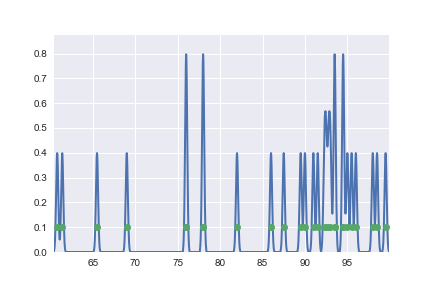
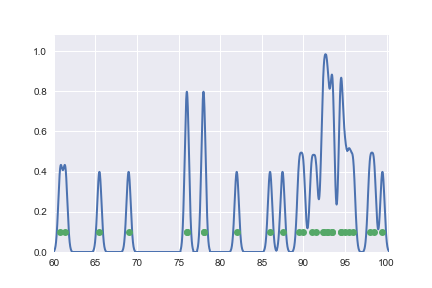
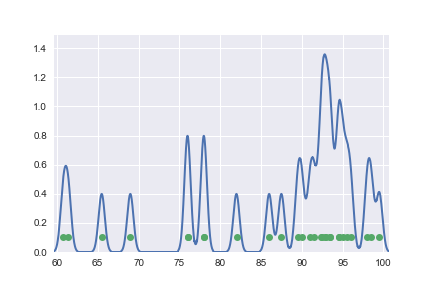
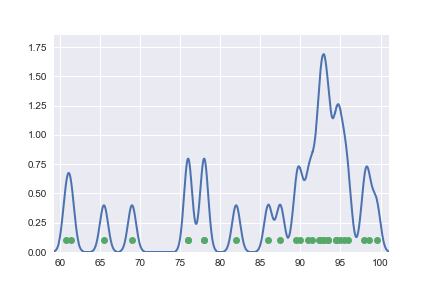
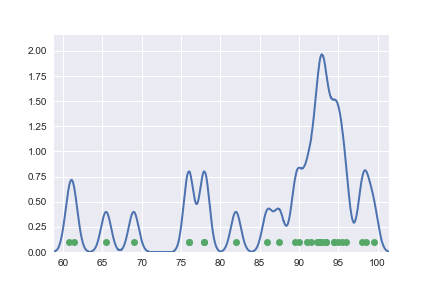
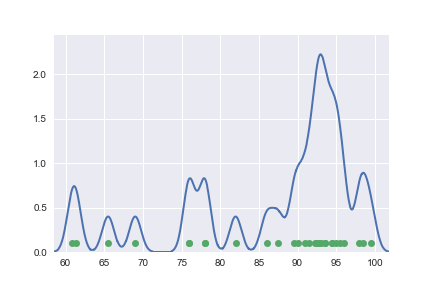
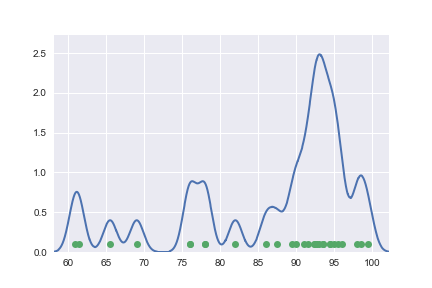
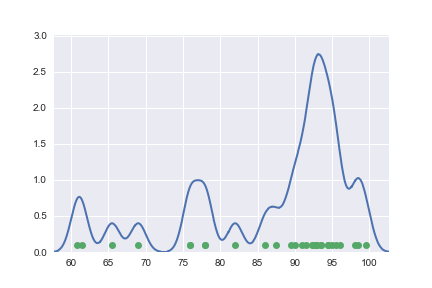
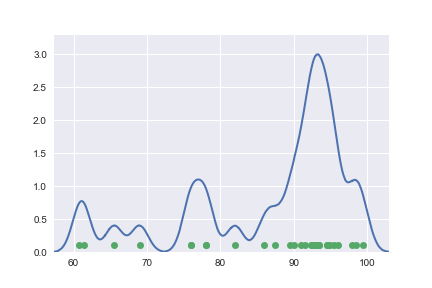
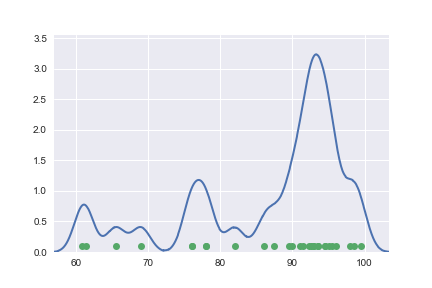
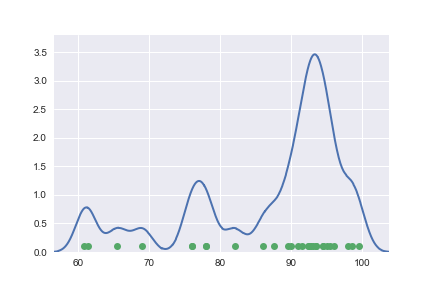
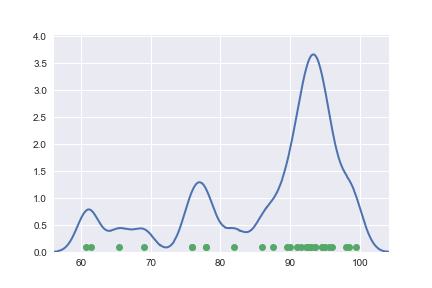
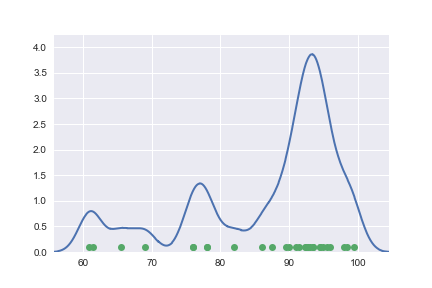
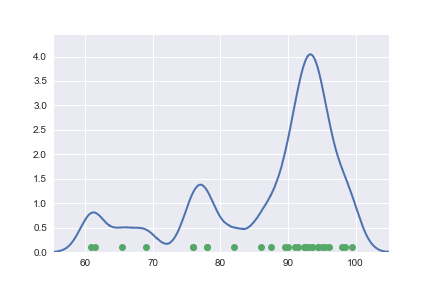
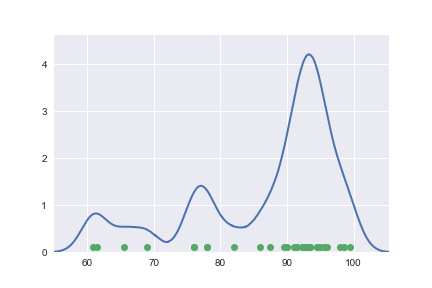
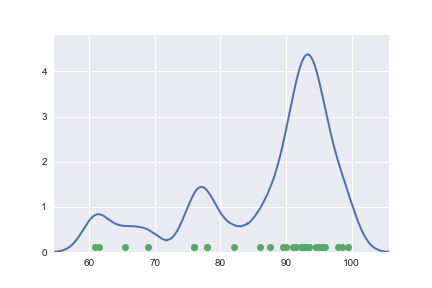
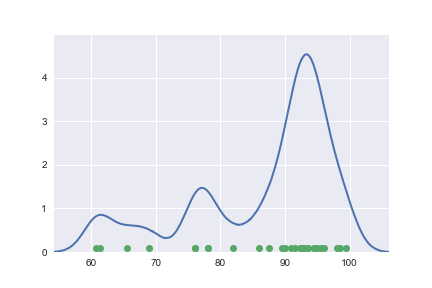
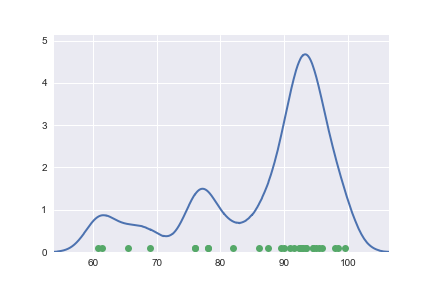
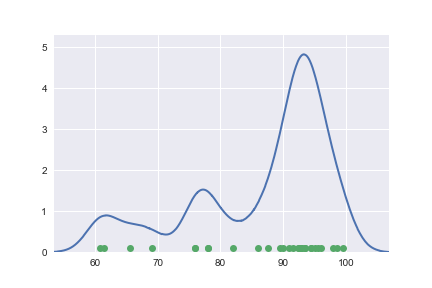
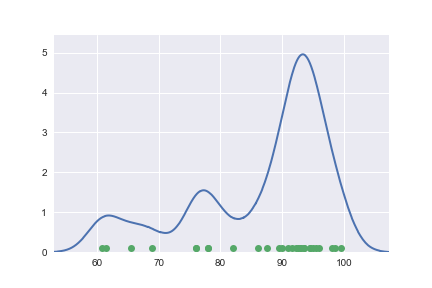
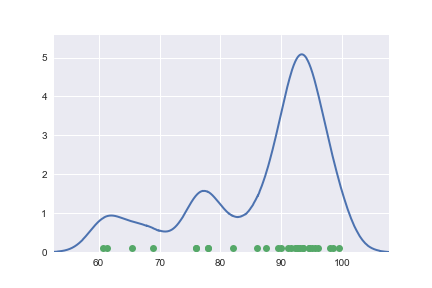
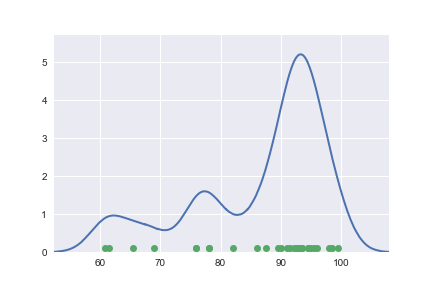
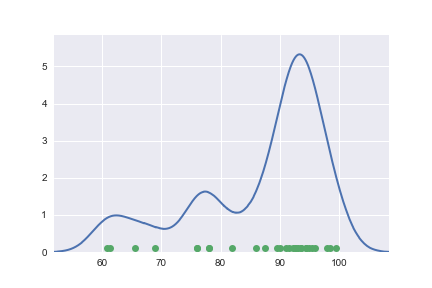
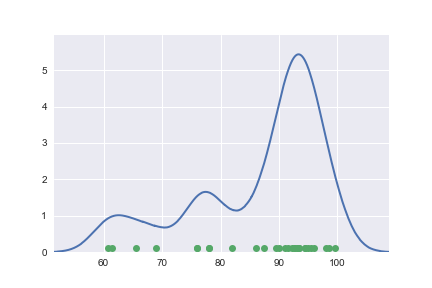
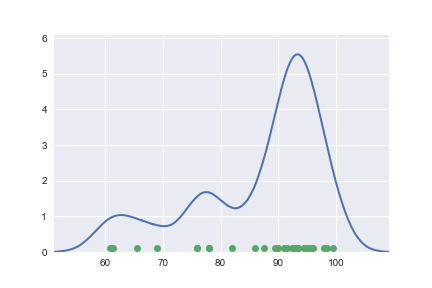
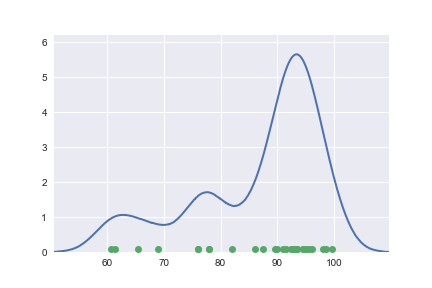
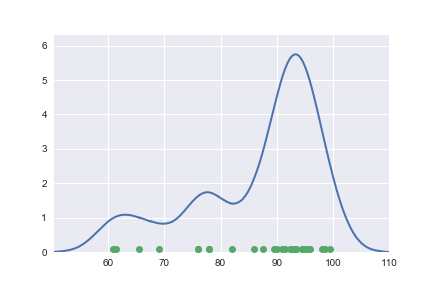
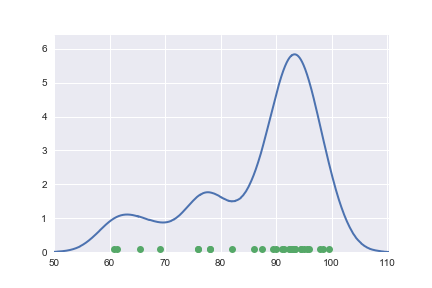
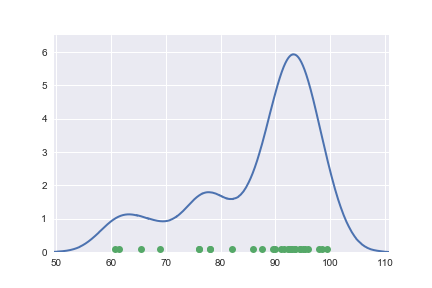
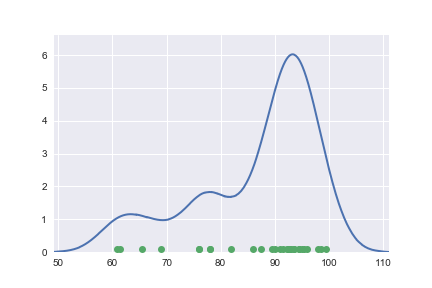
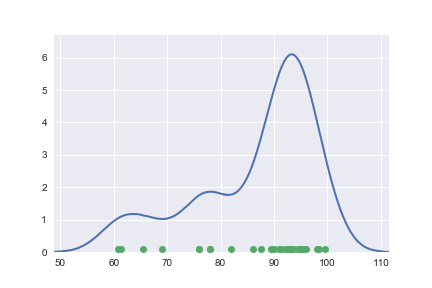
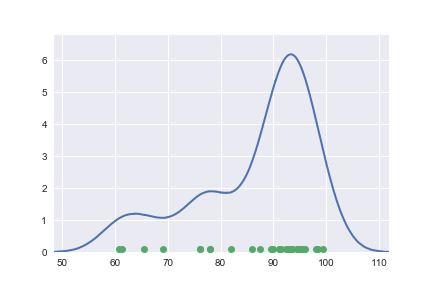
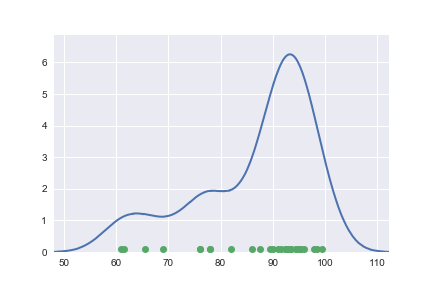
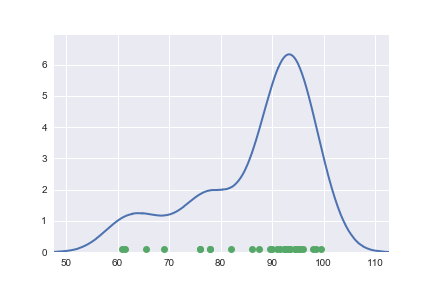
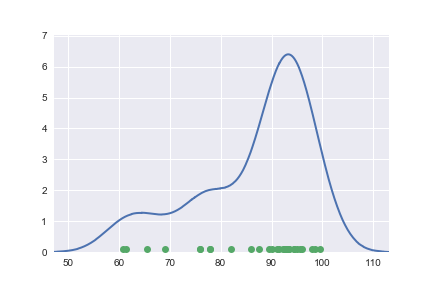
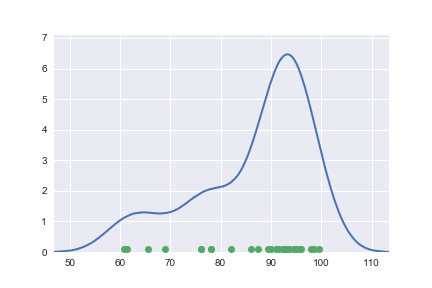
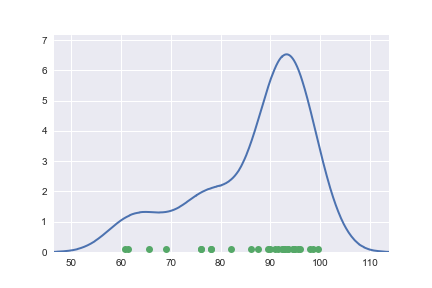
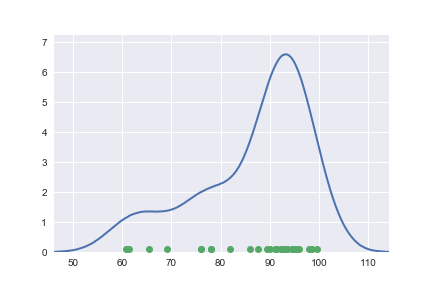
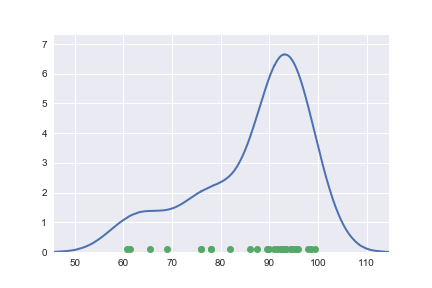
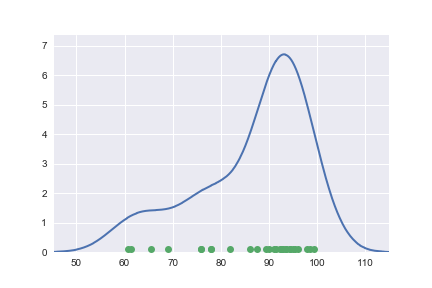
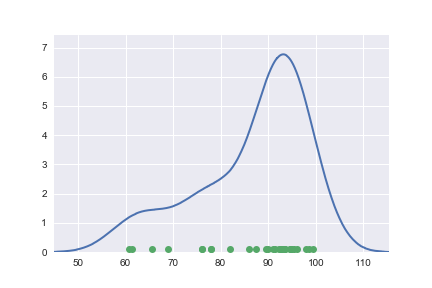
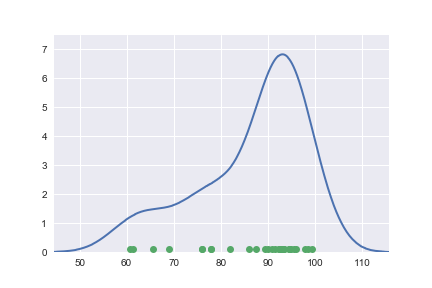
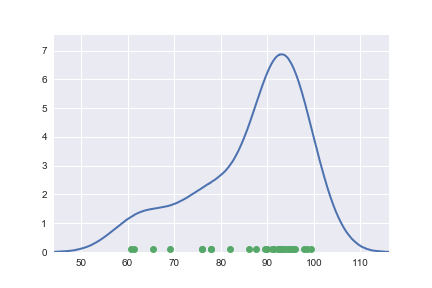
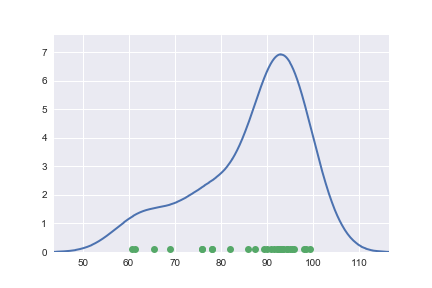
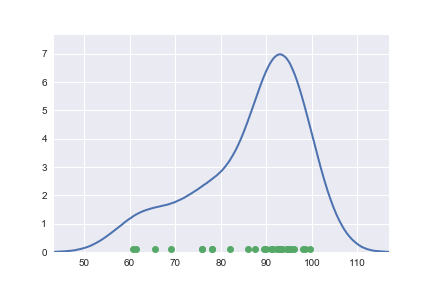
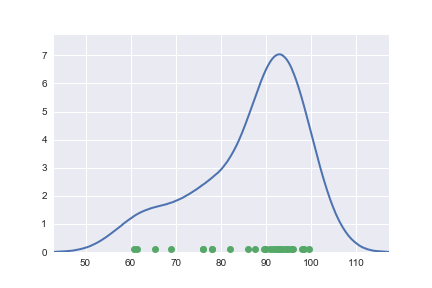
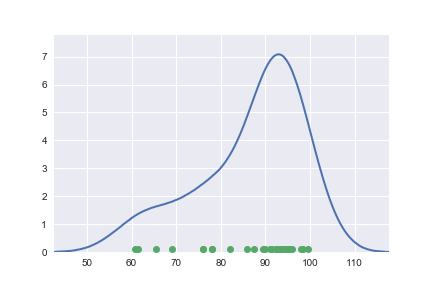
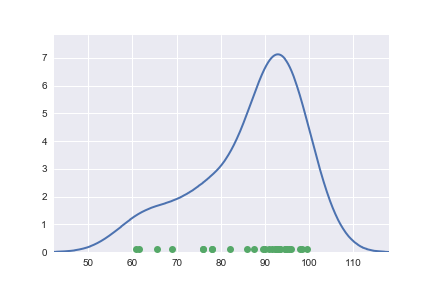
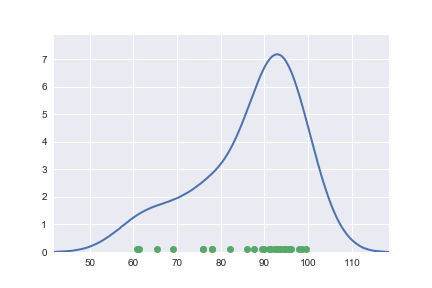
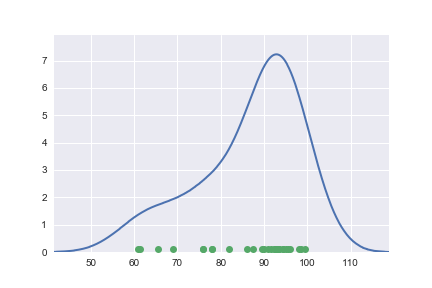
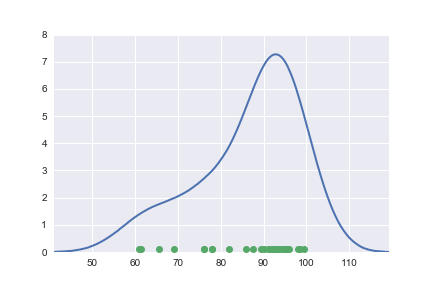
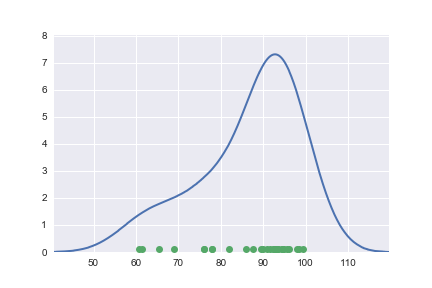
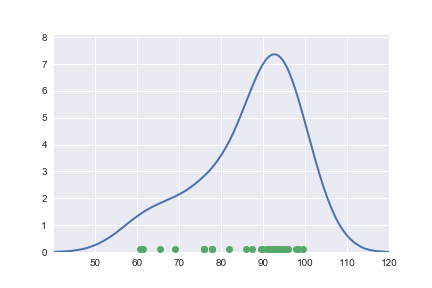
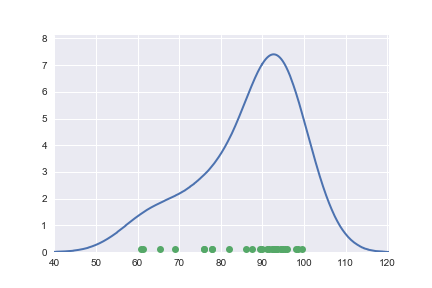
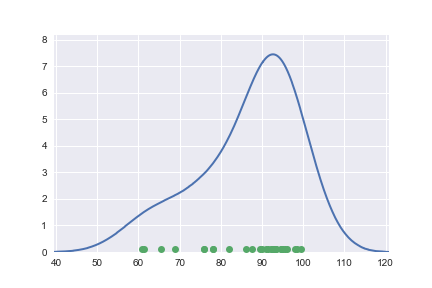
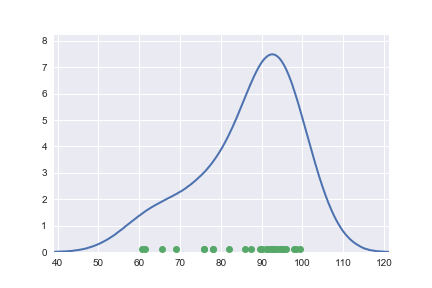
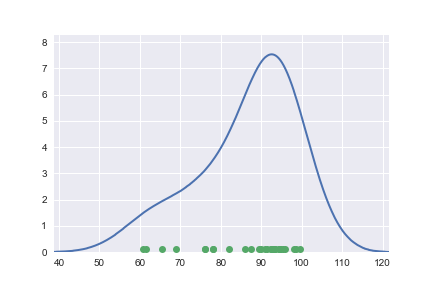
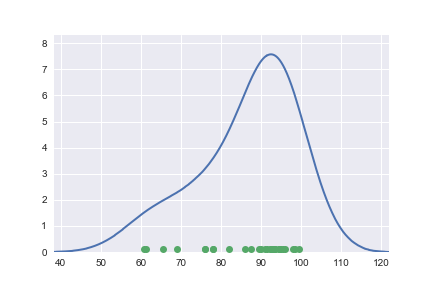
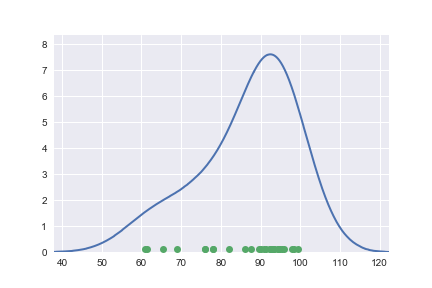
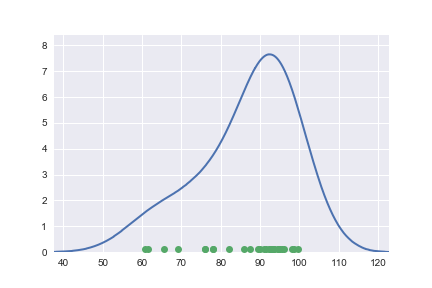
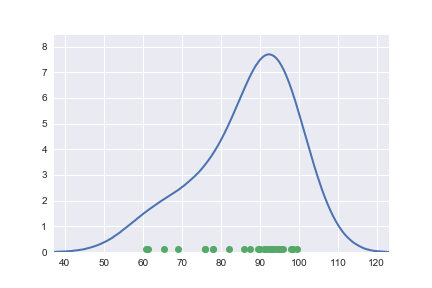
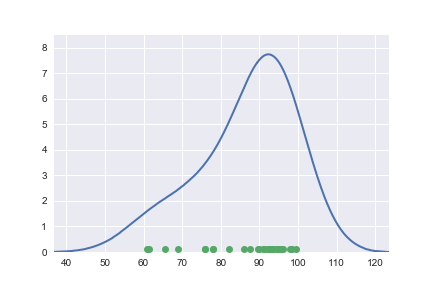
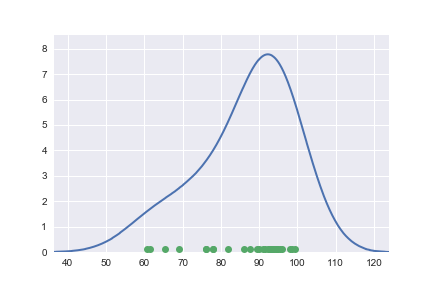
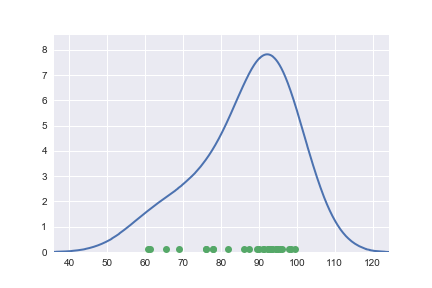
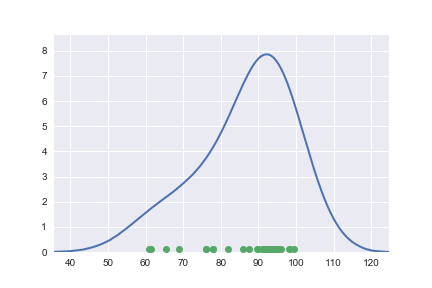
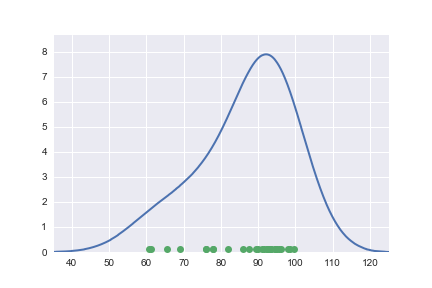
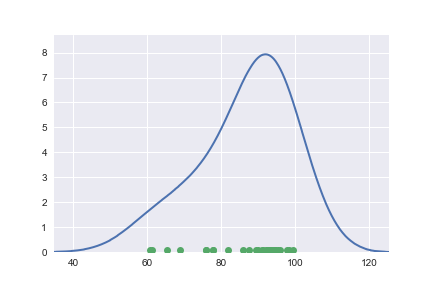
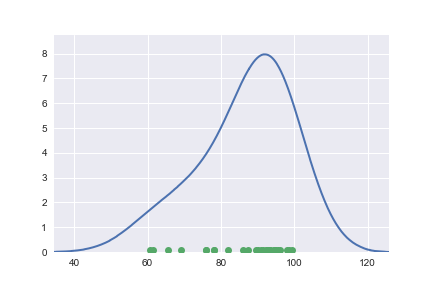
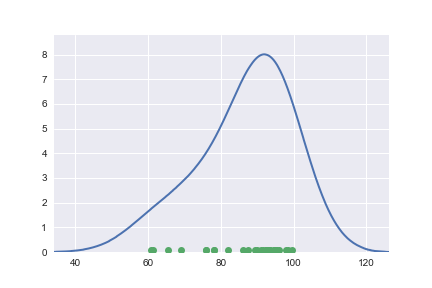
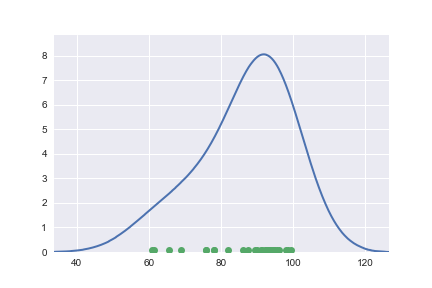
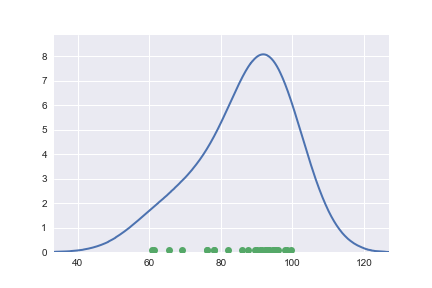
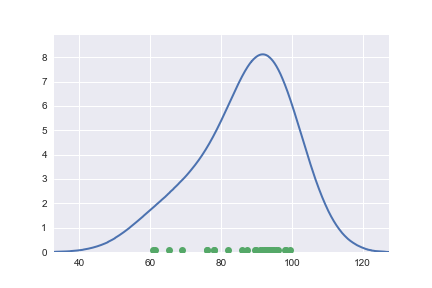
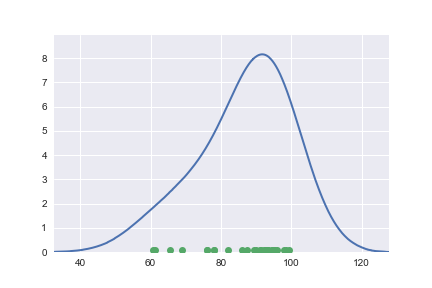
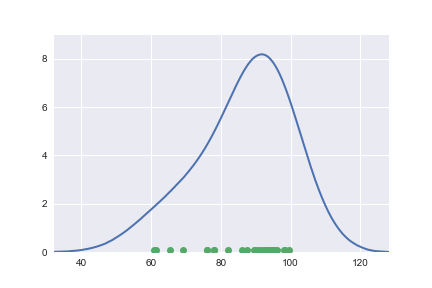
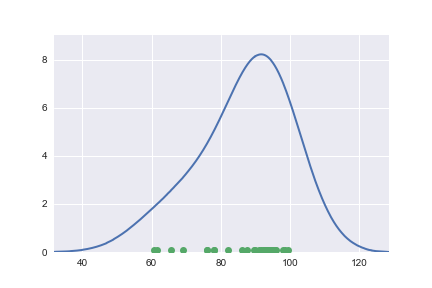
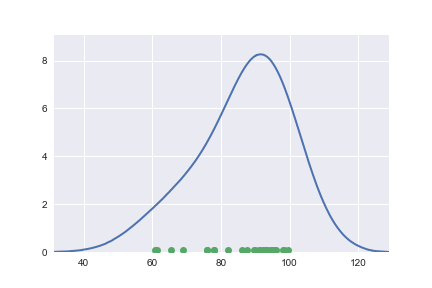
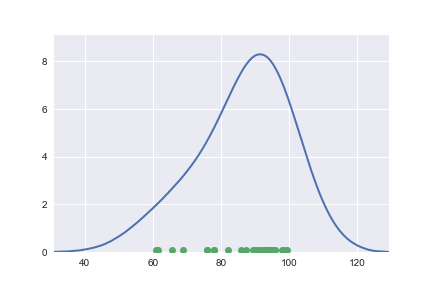
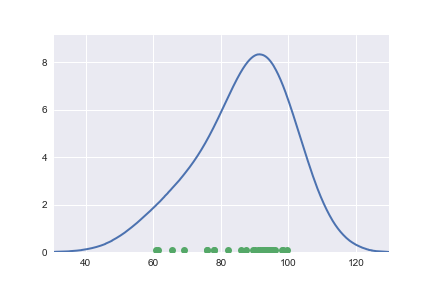
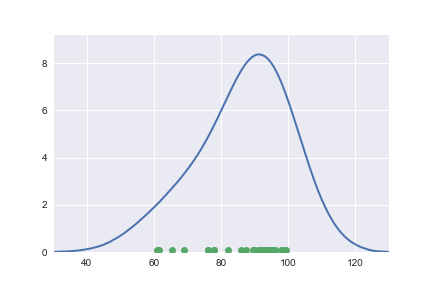
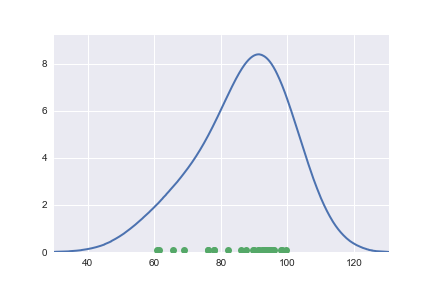
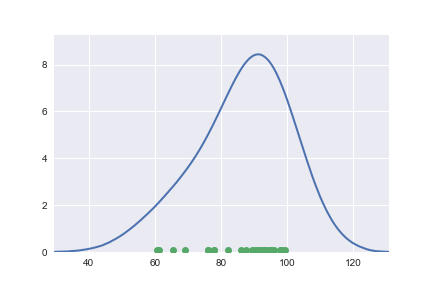
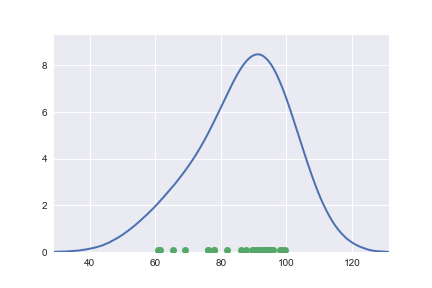
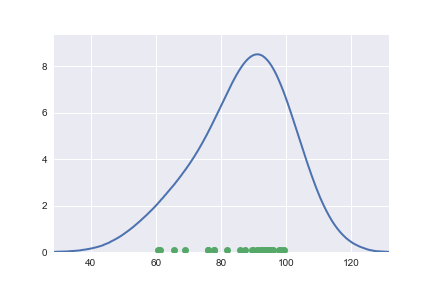
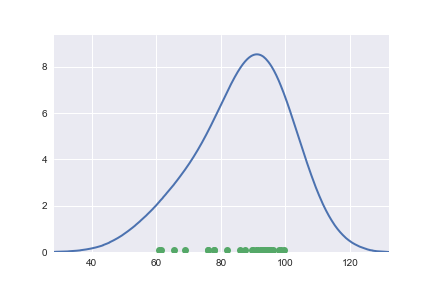
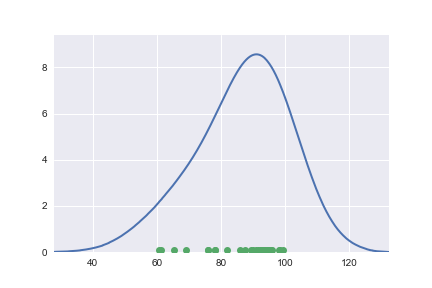
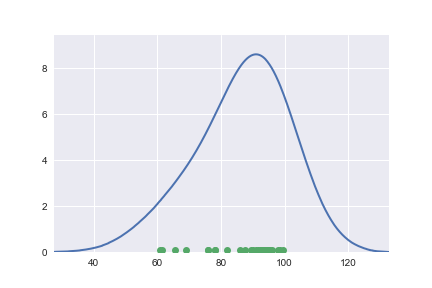
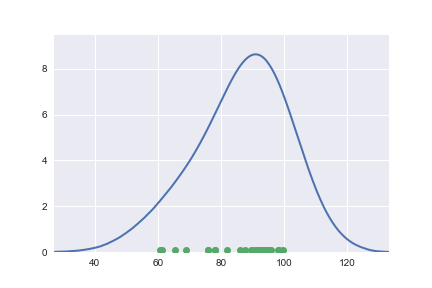
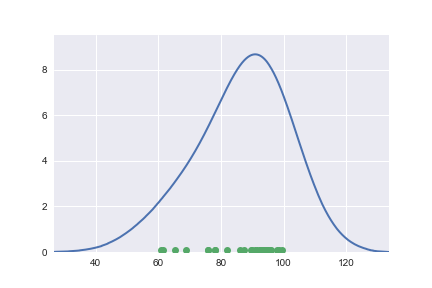
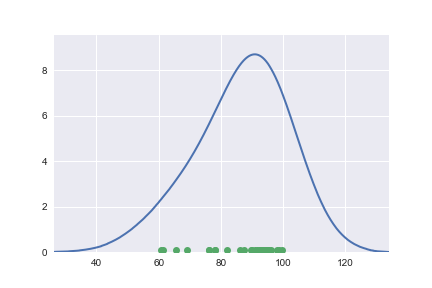
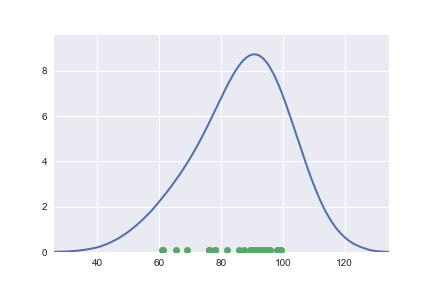
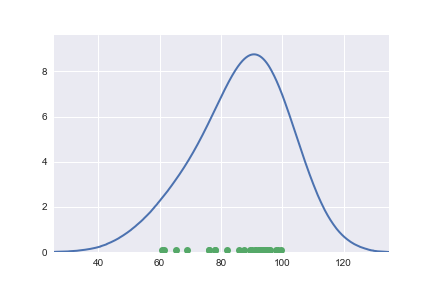
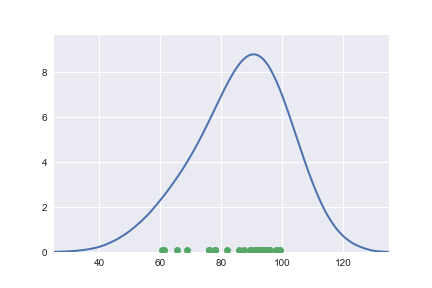
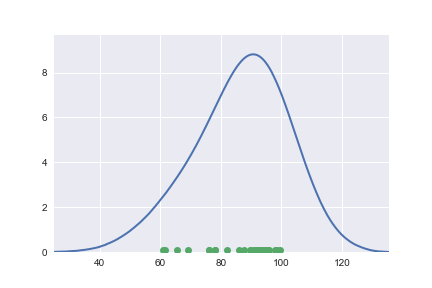
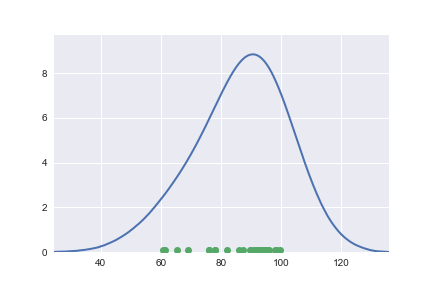
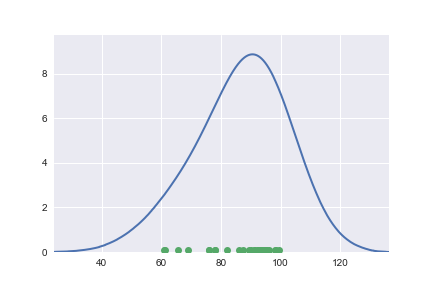
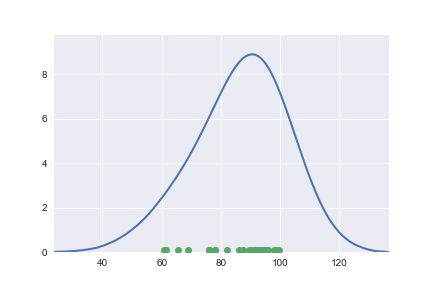
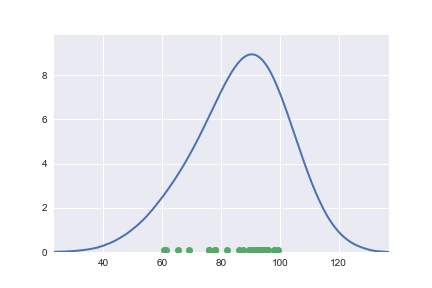
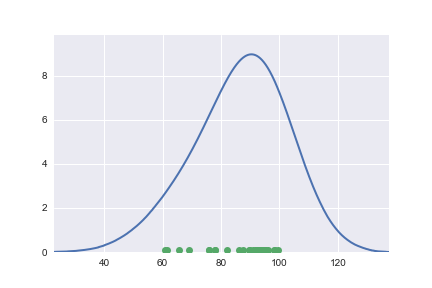
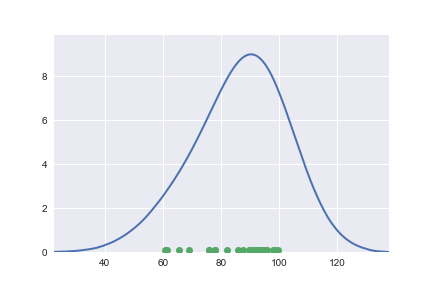
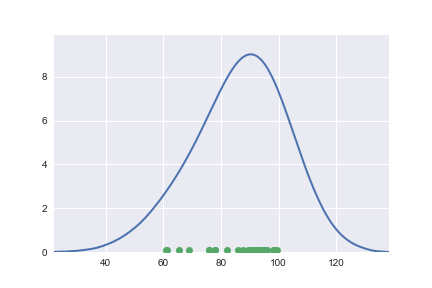

In [26]:
ani = getKdeGaussianAni(grades)
display_animation(ani, default_mode='once')

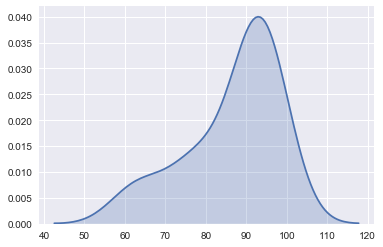

In [27]:
ax = sns.kdeplot(grades, shade=True, color="b")

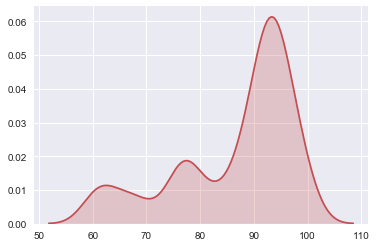

In [28]:
ax = sns.kdeplot(grades, bw=3, shade=True, color="r")

### Bandwidth Cross-Validation in Scikit-Learn

In [31]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

In [34]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 5, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(grades[:, None])
print (grid.best_params_)

{'bandwidth': 3.1413793103448278}


In [35]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [36]:
# The grid we'll use for plotting
x_grid = np.linspace(50, 110, 1000)
def fig_bw():
    fig, ax = plt.subplots()
    for bandwidth in [0.5, 1, 3, 10]:
        ax.plot(x_grid, kde_sklearn(grades, x_grid, bandwidth=bandwidth),
                label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
    ax.hist(grades, 20, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
    ax.set_xlim(50, 110)
    ax.set_ylim(0, 0.15)
    ax.legend(loc='upper left')

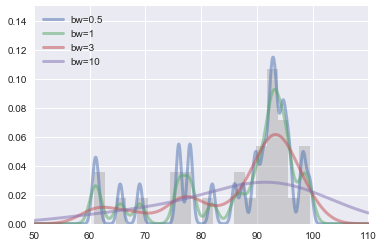

In [37]:
fig_bw()

It is also posible to use the kernel density estimation procedure to visualize a bivariate distribution 

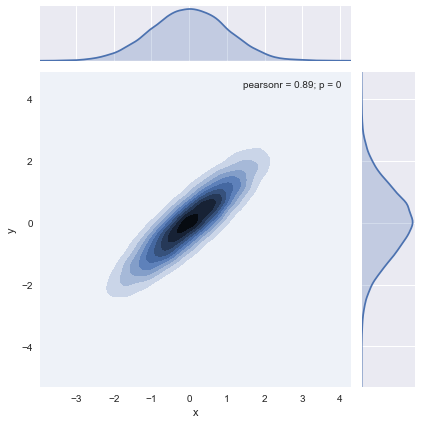

In [38]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

Multimodal is always interesting: qualitative distinction; distinct regimes or modes, e.g., wet and dry, convective vs. nonconvective regions. 

They serve as basis for composite analysis. Even unimodal can be a basis for composites e.g., weak or moderate rotation of mesoscale convective systems,

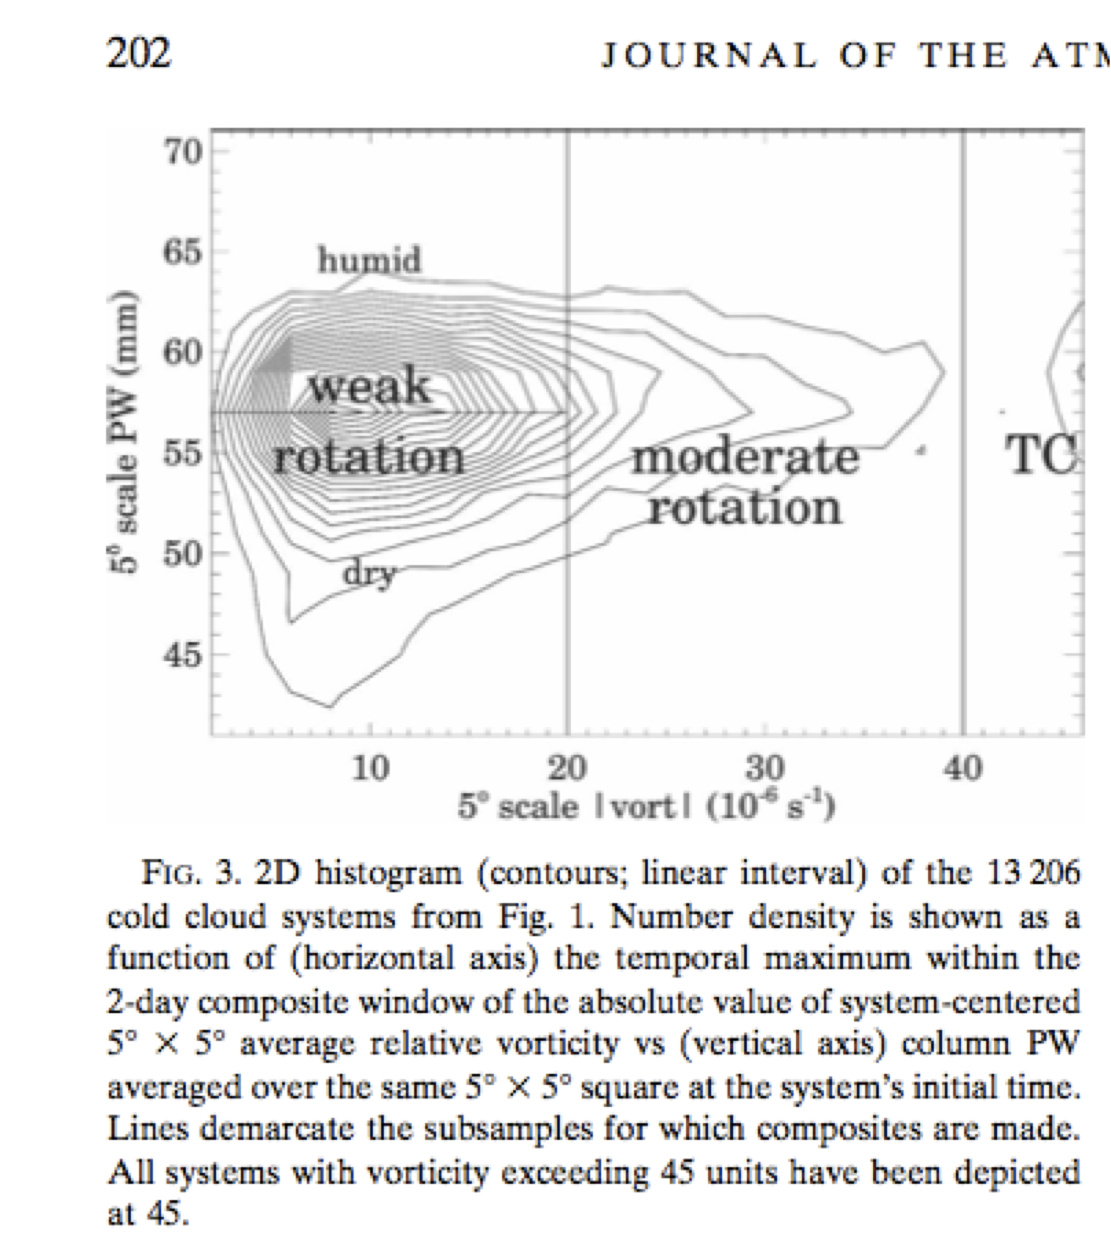

In [42]:
## Image(filename = "/Users/bem/Downloads/download.png", width=600, height=200)

#### Approximate correlation coefficient

This is calculated as usually taught:

\begin{equation}
      r_{xy} = \frac{s_{xy}}{s_xs_y} =\frac{1}{N-1}\frac{\sum_{i=1}^N (x_i-\overline{x})(y_i-\overline{y})}{s_xs_y}
\end{equation}
The correlation coefficient is constrained for fall in the range $\pm 1$. A value of +1 tells us that the
points $(x_i, y_i)$ define a straight line with a positive slope. A value of -1 tells us that the points $(x_i,
y_i)$ define a straight line with a negative slope. A value of 0 shows that there is no dependence of
$y$ on $x$ or vice versa (i.e., no correlation).

It is important to note that $r$ measures the strength of the linear relationship between $x$ and $y$ but a high value of |$r$| does not necessarily imply a cause and effect relationship or that the two variables are linearly related. It is easy to devise non-linear relationships that give a high
correlation coefficient. It is important to look at the data and use common sense.

Note, of course, that $r_{xy}$ is a random variable, and therefore has a probability distribution function, means, and variances.  It therefore is subject to confidence intervals. 

A smart person named Fisher figured out that if we consider the function of $r_{xy}=r$

\begin{equation}
    F(r)=\mathrm{arctanh}(r)
\end{equation}
then $F(r)$ approaches a Normal distribution as $N\to\infty$, with a standard deviation of $\sigma_F=\frac{1}{\sqrt{N-3}}$.

So, if we calculate $r$, then the 95% confidence interval for $F(r)$ is $\pm 1.96/\sqrt{N-3}$, and we can calculate the confidence intervals on $r$ by taking $\tanh\left(F(r)\pm1.96/\sqrt{N-3}\right)$.  (Remember the 95% confidence intervals for a Gaussian with standard deviation of 1 is $\pm1.96$)

Consider the example with the same data (detailed):

In [43]:
N=7000
ntosig=.5
x = np.random.randn(N);x=x-np.mean(x)
y = x + np.random.randn(N)*ntosig;y=y-np.mean(y)
r = np.sum(x*y)/np.std(x,ddof=1)/np.std(y,ddof=1)/(N-1)
print (r)
F = np.arctanh(r)
Fp95 = F+1.96/np.sqrt(N-3)
Fm95 = F-1.96/np.sqrt(N-3)
rp=np.tanh(Fp95)
rm=np.tanh(Fm95)
print ("r= %1.3f (%1.3f,%1.3f)"%(r,rm,rp))

0.8977582486037351
r= 0.898 (0.893,0.902)


So, for the correlation coefficient between x and y is estimated to be between the two values in parentheses, 95% of the time. If we had less data the spread in the 95% confidence interval would be wider:

In [44]:
N=10
ntosig=0.3
x = np.random.randn(N);x=x-np.mean(x)
y = x + np.random.randn(N)*ntosig;y=y-np.mean(y)
r = np.sum(x*y)/np.std(x,ddof=1)/np.std(y,ddof=1)/(N-1)
print (r)
F = np.arctanh(r)
Fp95 = F+1.96/np.sqrt(N-3)
Fm95 = F-1.96/np.sqrt(N-3)
rp=np.tanh(Fp95)
rm=np.tanh(Fm95)
print ( "r= %1.3f (%1.3f,%1.3f)"%(r,rm,rp) )

0.9830820348527968
r= 0.983 (0.928,0.996)
